In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re

In [ ]:
!gdown '1RaN68cYO78JUgGzQ5jZ7qIdLilRWr2Sk'

Downloading...
From: https://drive.google.com/uc?id=1RaN68cYO78JUgGzQ5jZ7qIdLilRWr2Sk
To: /content/heart_attack_prediction_dataset.csv
100% 1.28M/1.28M [00:00<00:00, 33.7MB/s]


In [ ]:
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
country_counts = df['Country'].value_counts().sort_values(ascending=False)
country_counts

Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: Country, dtype: int64

Mapping categorical data to numeric and make Systolic and Diastolic column out of Blood pressure

In [ ]:
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
df['Hemisphere'] = df['Hemisphere'].map({'Northern Hemisphere': 0, 'Southern Hemisphere': 1})
df['Diet'] = df['Diet'].map({'Unhealthy': 0, 'Average': 0.5, 'Healthy': 1})

df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df[['Systolic', 'Diastolic']] = df[['Systolic', 'Diastolic']].astype(int)
df = df.drop('Blood Pressure', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   int64  
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   float64
 12  Previous Heart Probl

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Sex,8763.0,0.302636,0.459425,0.000000,0.000000,0.000000,1.000000,1.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709


# Part1-statistical Analysis

In [ ]:
columns_to_remove = ['Patient ID','Country','Continent','Diet']
binary_columns = []

for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 2:
        binary_columns.append(column)

df1 = df.drop(columns=binary_columns)
df1 = df1.drop(columns=columns_to_remove)
mode_values = df1.mode().T[0]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
def is_outlier(value, lower, upper):
    return (value < lower) or (value > upper)
outliers = (df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))
outliers_count = outliers.sum()
mode_outliers_df = pd.DataFrame({'mode': mode_values, 'outliers': outliers_count})
result_df = pd.concat([df1.describe().T, mode_outliers_df], axis=1)

result_df

,count,mean,std,min,25%,50%,75%,max,mode,outliers
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000,90.000000,0
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000,235.000000,0
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000,94.000000,0
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709,0.002442,0
Stress Level,8763.0,5.469702,2.859622,1.000000,3.000000,5.000000,8.000000,10.000000,2.000000,0
Sedentary Hours Per Day,8763.0,5.993690,3.466359,0.001263,2.998794,5.933622,9.019124,11.999313,0.001263,0
Income,8763.0,158263.181901,80575.190806,20062.000000,88310.000000,157866.000000,227749.000000,299954.000000,225278.000000,0
BMI,8763.0,28.891446,6.319181,18.002337,23.422985,28.768999,34.324594,39.997211,18.002337,0
Triglycerides,8763.0,417.677051,223.748137,30.000000,225.500000,417.000000,612.000000,800.000000,799.000000,0
Physical Activity Days Per Week,8763.0,3.489672,2.282687,0.000000,2.000000,3.000000,5.000000,7.000000,3.000000,0


In [ ]:

corr = df.corr()

# Sort the correlation matrix by descending correlation
sorted_corr = corr.sort_values(by='Heart Attack Risk',ascending=False)

# Get the five most correlated columns
most_correlated_columns = sorted_corr.index[1:6]
most_correlated_columns

<ipython-input-10-e8a58d4248ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Index(['Cholesterol', 'Systolic', 'Diabetes', 'Exercise Hours Per Week',
       'Triglycerides'],
      dtype='object')

In [ ]:
df['Heart Attack Risk'].corr(df['Cholesterol'])

0.019339677892136222

# Part1-Boxplot

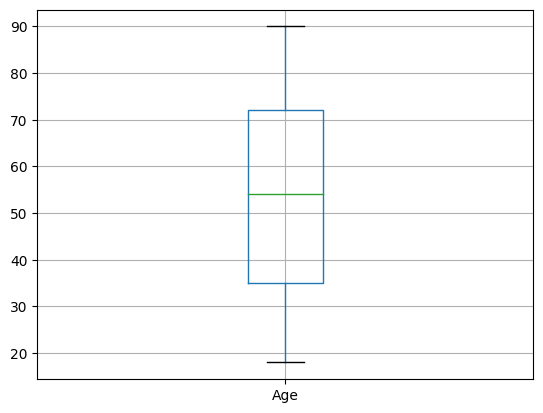

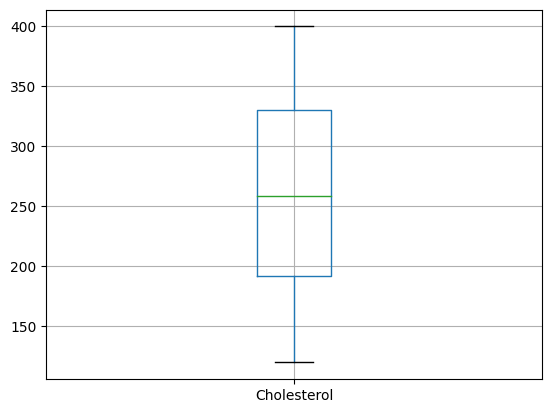

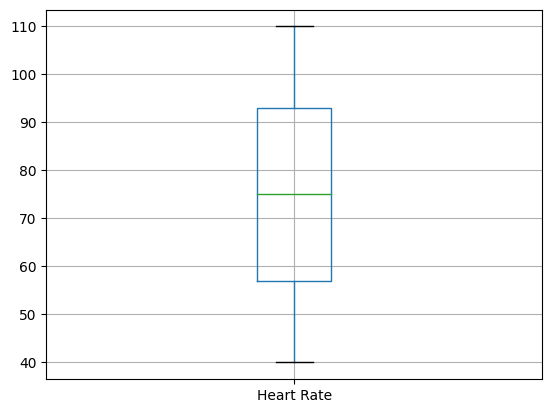

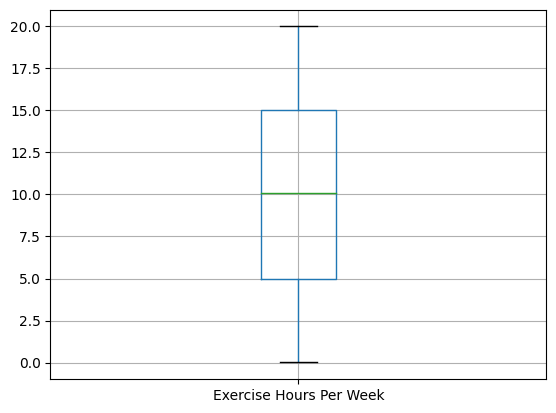

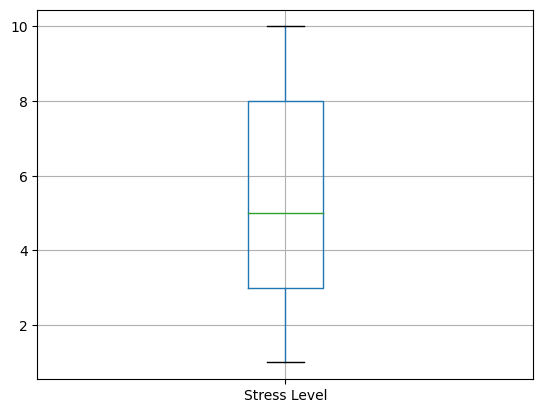

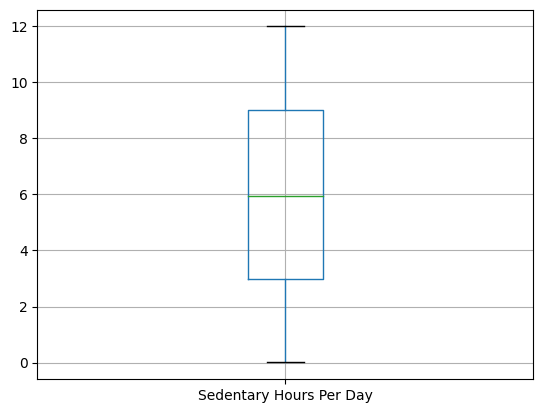

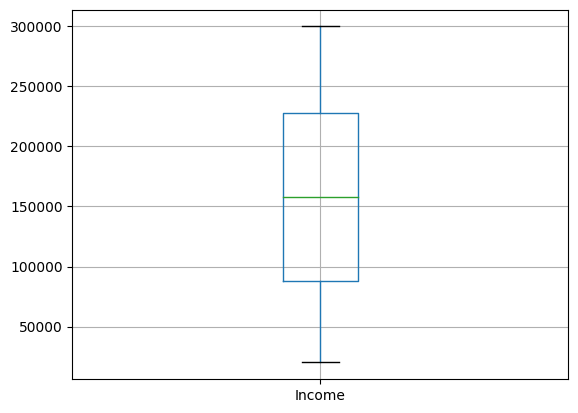

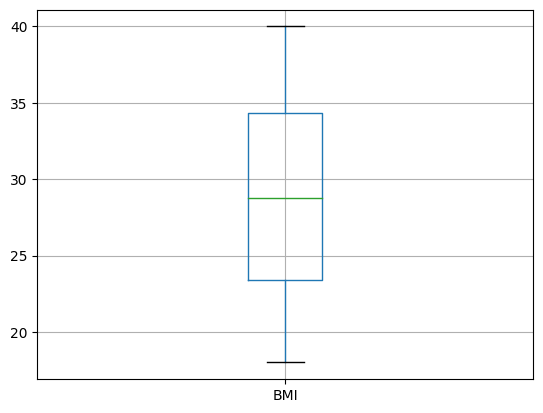

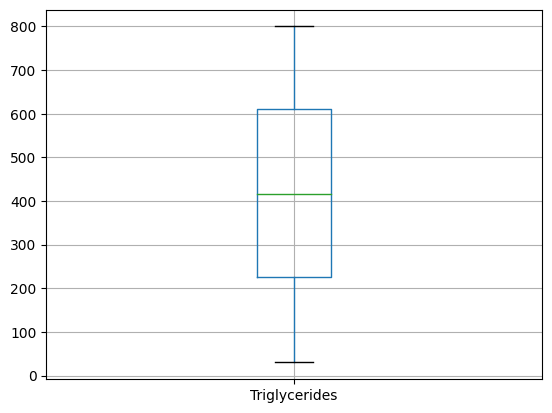

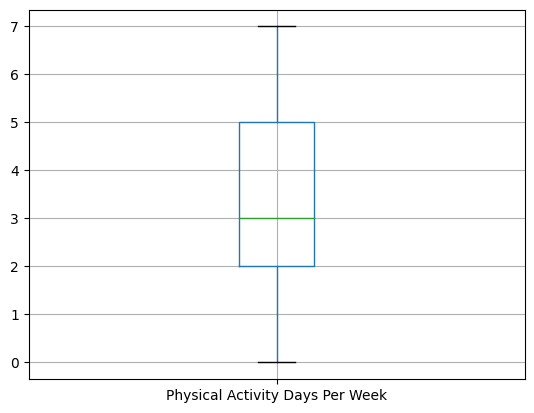

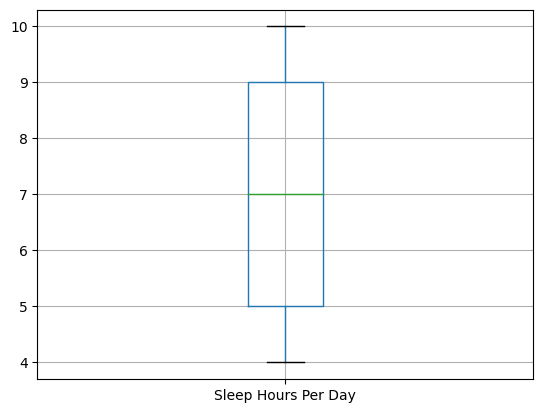

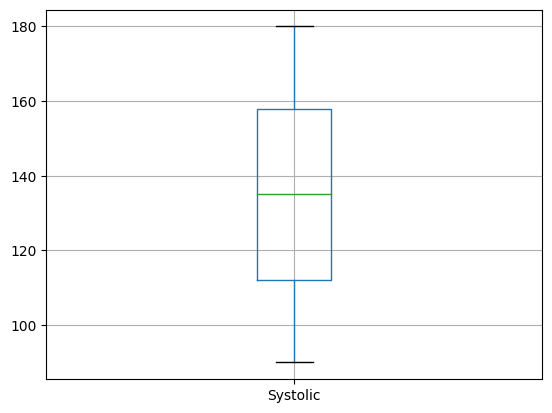

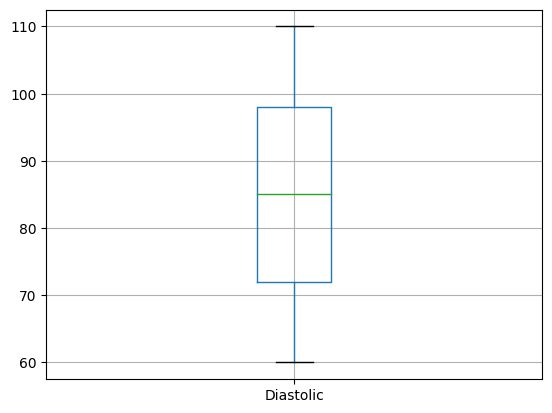

In [ ]:
for name in df1:
   boxplot = df1.boxplot(column=[name])
   plt.show(boxplot)

# **Part2**

# Inconsistency

Inconsistency may happen between these columns:
Physical Activity Days Per Week & Exercise Hours Per Week

*   Physical Activity Days Per Week & Exercise Hours Per Week
*   Systolic and Diastolic
*   BMI and Obesity
*   sedentary + sleep >24
*   Cholesterol and Systolic
*   Medication use and Previous heart problems
*   Triglycerides and Previous heart problems

In [ ]:
physical_filtered_df = df[(((df['Physical Activity Days Per Week'] == 0) & (df['Exercise Hours Per Week'] != 0)) |((df['Physical Activity Days Per Week'] != 0) & (df['Exercise Hours Per Week'] == 0)))]

In [ ]:
physical_filtered_df[['Physical Activity Days Per Week', 'Exercise Hours Per Week']]

,Physical Activity Days Per Week,Exercise Hours Per Week
0,0,4.168189
10,0,16.841988
17,0,8.917907
23,0,10.995813
31,0,18.848526
...,...,...
8685,0,1.554412
8703,0,10.785485
8710,0,17.961744
8735,0,0.713939


In [ ]:
blood_pressure_filter = df[df['Systolic']<df1['Diastolic']]
blood_pressure_filter

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
34,DDG3686,42,0,360,44,1,0,1,1,1,...,29.701877,586,1,4,India,Asia,0,1,103,107
107,ERP9347,80,0,334,110,0,0,1,0,0,...,31.362314,530,0,9,United Kingdom,Europe,0,0,105,108
154,YJM3019,28,0,209,81,1,0,1,1,0,...,28.962687,167,3,9,South Korea,Asia,0,1,98,109
161,EIH9699,41,0,398,56,1,0,1,1,0,...,33.625390,141,0,7,Vietnam,Asia,0,1,96,106
200,JTS2700,78,0,299,66,0,1,1,0,1,...,18.333632,218,5,6,Australia,Australia,1,0,90,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,DFE7439,65,1,244,62,0,0,1,0,0,...,34.413850,93,1,8,Spain,Europe,1,0,96,102
8689,LAC0889,24,0,262,93,1,0,1,0,0,...,35.349263,331,2,10,Italy,Europe,1,0,97,108
8724,WFO1019,29,0,280,90,1,1,1,1,1,...,29.024055,423,5,5,Vietnam,Asia,0,0,106,107
8730,GER0333,27,1,319,53,1,1,0,1,1,...,32.643967,557,6,7,Canada,North America,0,1,96,99


It is 4% of our data and completely illogical so we drop these data

In [ ]:
df = df[df['Systolic'] > df['Diastolic']]

In [ ]:
Triglycerides_filtered_df = df[(df['Triglycerides'] < 150) & (df['Previous Heart Problems'] == 1)]
Triglycerides_filtered_df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
16,DXB2434,69,0,379,40,1,1,1,1,1,...,28.332747,68,3,6,Brazil,South America,1,0,173,75
53,IKY4481,67,0,222,105,1,1,1,1,0,...,37.258748,92,0,8,Australia,Australia,1,0,159,79
59,WAR7163,72,0,377,61,1,1,1,1,0,...,28.514638,106,1,10,Japan,Asia,0,1,144,98
64,TQT8266,53,0,133,110,1,1,1,1,0,...,27.681792,67,4,9,Canada,North America,0,0,161,108
75,DHP4080,55,0,163,63,0,0,1,1,0,...,26.608767,131,0,7,Australia,Australia,1,1,139,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,NTL8842,45,1,166,63,0,0,1,1,0,...,29.640828,74,1,6,New Zealand,Australia,1,0,98,60
8747,BBS4075,24,0,396,45,0,0,1,1,1,...,38.436301,51,1,8,China,Asia,0,1,118,89
8752,UBM5982,65,0,150,106,1,0,1,0,1,...,22.710546,83,1,5,Argentina,South America,1,0,152,99
8758,MSV9918,60,0,121,61,1,1,1,0,1,...,19.655895,67,7,7,Thailand,Asia,0,0,94,76



It is less than 8% of our data so we drop it

In [ ]:
df = df.drop(df[(df['Triglycerides'] < 150) & (df['Previous Heart Problems'] == 1)].index, axis=0)
df['Patient ID'].count()

7670

In [ ]:
fat_filtered_df = df[((df['BMI']>30) & (df['Obesity'] ==0))|((df['BMI']<25) & (df['Obesity'] ==1))]
fat_filtered_df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,0,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,1,0,158,88
3,JLN3497,84,0,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,0,0,163,100
4,GFO8847,66,0,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,0,0,91,88
7,XXM0972,84,0,220,107,0,0,1,1,1,...,22.221862,370,6,7,Japan,Asia,0,1,131,68
9,FTJ5456,43,1,248,55,0,1,1,1,1,...,22.558917,232,7,7,Japan,Asia,0,0,160,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8750,FDK8693,34,1,304,93,0,1,0,1,1,...,22.418494,791,4,5,China,Asia,0,0,102,92
8751,SVO4635,75,0,176,78,0,0,1,1,1,...,23.793280,748,5,8,Spain,Europe,1,1,102,89
8755,KQR8949,25,0,307,78,0,1,1,0,1,...,33.469360,296,7,5,Spain,Europe,1,0,137,94
8759,QSV6764,28,1,120,73,1,0,0,1,0,...,23.993866,617,4,9,Canada,North America,0,0,157,102


In [ ]:
day_filtered_df = df[df['Sedentary Hours Per Day'] + df['Sleep Hours Per Day'] > 24]
day_filtered_df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic


In [ ]:
Cholesterol_filtered_df = df[(df['Cholesterol'] > 240) & (df['Systolic'] < 120)  & (df['Diastolic'] < 80)]
Cholesterol_filtered_df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
6,WYV0966,90,0,358,84,0,0,1,0,1,...,28.885811,284,4,10,Canada,North America,0,1,102,73
10,HSD6283,73,1,373,97,1,1,1,0,1,...,22.867911,469,0,4,South Africa,Africa,1,0,107,69
28,FFF6730,79,1,328,74,0,0,1,0,1,...,31.633196,482,4,6,China,Asia,0,0,113,78
35,FLG2019,52,1,360,106,1,0,1,1,0,...,27.095853,743,4,5,New Zealand,Australia,1,1,94,60
47,UBJ2564,70,1,279,86,0,0,1,1,1,...,29.970809,792,4,6,Japan,Asia,0,1,102,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,GOR6731,76,0,347,75,1,0,1,0,1,...,34.193579,696,1,4,Japan,Asia,0,1,99,64
8710,VNB9587,27,1,343,84,1,0,0,1,0,...,22.710059,546,0,9,Canada,North America,0,0,99,75
8722,PKV6924,26,0,259,107,0,0,1,0,0,...,23.252114,653,3,5,South Africa,Africa,1,0,106,64
8744,VXA0409,83,0,322,67,1,1,1,0,1,...,28.873162,518,6,6,Vietnam,Asia,0,1,91,69


In [ ]:
Medication_Use_filtered_df = df[(df['Medication Use'] == 0) & (df['Previous Heart Problems'] == 1)]
Medication_Use_filtered_df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
1,CZE1114,21,0,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,0,0,165,93
3,JLN3497,84,0,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,0,0,163,100
4,GFO8847,66,0,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,0,0,91,88
19,RQX1211,60,0,145,71,1,0,1,0,1,...,29.162319,247,7,7,Canada,North America,0,0,160,98
22,LBY7992,50,0,359,97,0,1,1,0,1,...,34.651090,358,4,8,Spain,Europe,1,0,175,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8744,VXA0409,83,0,322,67,1,1,1,0,1,...,28.873162,518,6,6,Vietnam,Asia,0,1,91,69
8746,FFT2368,62,1,263,62,0,1,1,1,0,...,37.364408,512,3,5,Brazil,South America,1,1,105,98
8748,GQZ5013,81,0,137,61,1,0,1,1,0,...,35.074391,191,3,10,Spain,Europe,1,0,143,64
8753,NVC8704,82,0,311,87,0,1,1,1,1,...,27.694240,515,1,5,Australia,Australia,1,1,126,108


# Validity

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7670 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7670 non-null   object 
 1   Age                              7670 non-null   int64  
 2   Sex                              7670 non-null   int64  
 3   Cholesterol                      7670 non-null   int64  
 4   Heart Rate                       7670 non-null   int64  
 5   Diabetes                         7670 non-null   int64  
 6   Family History                   7670 non-null   int64  
 7   Smoking                          7670 non-null   int64  
 8   Obesity                          7670 non-null   int64  
 9   Alcohol Consumption              7670 non-null   int64  
 10  Exercise Hours Per Week          7670 non-null   float64
 11  Diet                             7670 non-null   float64
 12  Previous Heart Probl

In [ ]:
valid_id=df['Patient ID']
pattern = r'^[A-Z]+[0-9]+$'
valid_ids = sum(1 for patient_id in valid_id if re.match(pattern, patient_id))
validitity = (valid_ids/len(valid_id))*100
print(validitity)
valid_ids_df = df[df['Patient ID'].str.match(pattern)]

99.9348109517601


In [ ]:
valid_ids_df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,0,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,1,0,158,88
1,CZE1114,21,0,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,0,0,165,93
2,BNI9906,21,1,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,0,0,174,99
3,JLN3497,84,0,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,0,0,163,100
4,GFO8847,66,0,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,0,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,BUE0416,22,0,347,108,0,1,1,0,1,...,20.295054,641,2,9,Canada,North America,0,1,115,87
8757,YDX2478,59,1,378,99,0,1,1,1,0,...,39.976061,158,1,9,China,Asia,0,0,93,78
8759,QSV6764,28,1,120,73,1,0,0,1,0,...,23.993866,617,4,9,Canada,North America,0,0,157,102
8760,XKA5925,47,0,250,105,0,1,1,1,1,...,35.406146,527,4,4,Brazil,South America,1,1,161,75


info shows valid syntax for all columns except Patient ID

In [ ]:
df['Age'][(df['Age']<1) & (df['Age']>100)].count()

0

In [ ]:
df['Cholesterol'][df['Cholesterol']>1000].count()

0

In [ ]:
df['Heart Rate'][(df['Heart Rate']>170)|(df['Heart Rate']<40)].count()

0

In [ ]:
columns = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Heart Attack Risk']
for column in columns:
  is_zero_or_one = df[column].isin([0, 1])
  if is_zero_or_one is False:
    print(column)

In [ ]:
for name in df:
  print(name)
  print(df[name].isna().sum())

Patient ID
0
Age
0
Sex
0
Cholesterol
0
Heart Rate
0
Diabetes
0
Family History
0
Smoking
0
Obesity
0
Alcohol Consumption
0
Exercise Hours Per Week
0
Diet
0
Previous Heart Problems
0
Medication Use
0
Stress Level
0
Sedentary Hours Per Day
0
Income
0
BMI
0
Triglycerides
0
Physical Activity Days Per Week
0
Sleep Hours Per Day
0
Country
0
Continent
0
Hemisphere
0
Heart Attack Risk
0
Systolic
0
Diastolic
0


# **Part3**

# Adding new features (in addition to Systolic and Diastolic)

In [ ]:
Health_Metrics_filtered_df = df[((df['Cholesterol'] > 200) & (df['Cholesterol'] < 240)) & ((df['Heart Rate'] > 60) & (df['Heart Rate'] < 100))
& (df['Diabetes'] == 0) & ((df['BMI'] > 19) & (df['BMI'] < 28 )) & ((df['Systolic'] < 120) & (df['Diastolic'] < 80))]
Health_Metrics_filtered_df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
55,OHD3889,24,0,218,68,0,1,1,1,1,...,27.183638,398,3,8,Australia,Australia,1,0,118,76
832,GBU3786,45,0,237,91,0,1,1,0,1,...,24.701420,736,7,7,United States,North America,0,0,105,67
2203,AFS1217,29,0,236,87,0,1,1,0,1,...,22.870133,601,1,6,Thailand,Asia,0,1,107,63
2887,NNY7030,33,1,210,88,0,1,0,0,1,...,27.441711,290,1,4,Germany,Europe,0,0,102,69
3231,ASX5300,44,0,221,78,0,0,1,1,0,...,20.453485,484,3,7,Vietnam,Asia,0,0,116,62
3768,RNS9734,54,1,229,72,0,1,1,1,1,...,26.807188,613,1,4,Colombia,South America,0,0,102,66
3835,GBU9329,78,0,210,77,0,0,1,1,0,...,27.337338,662,3,9,South Africa,Africa,1,1,115,69
3897,CVQ1274,24,1,229,75,0,0,0,1,0,...,26.116082,522,6,8,Argentina,South America,1,0,108,67
6221,PNZ4272,82,1,204,61,0,1,1,0,0,...,24.628331,168,4,8,Thailand,Asia,0,0,95,61
8279,FTW9383,80,1,201,98,0,1,1,0,1,...,20.933088,486,5,10,France,Europe,0,0,119,72


Health Metrics combine Cholestrol, heart rate, diabetes, BMI and blood pressure to have healthy person(1) or unhealthy(0)

In [ ]:
df['Health_Metrics'] = np.where(
    ((df['Cholesterol'] > 200) & (df['Cholesterol'] < 240)) &
    ((df['Heart Rate'] > 60) & (df['Heart Rate'] < 100)) &
    (df['Diabetes'] == 0) &
    ((df['BMI'] > 19) & (df['BMI'] < 28)) &
    ((df['Systolic'] < 120) & (df['Diastolic'] < 80)),
    1,
    0
)
df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Health_Metrics
0,BMW7812,67,0,208,72,0,0,1,0,0,...,286,0,6,Argentina,South America,1,0,158,88,0
1,CZE1114,21,0,389,98,1,1,1,1,1,...,235,1,7,Canada,North America,0,0,165,93,0
2,BNI9906,21,1,324,72,1,0,0,0,0,...,587,4,4,France,Europe,0,0,174,99,0
3,JLN3497,84,0,383,73,1,1,1,0,1,...,378,3,4,Canada,North America,0,0,163,100,0
4,GFO8847,66,0,318,93,1,1,1,1,0,...,231,1,5,Thailand,Asia,0,0,91,88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,BUE0416,22,0,347,108,0,1,1,0,1,...,641,2,9,Canada,North America,0,1,115,87,0
8757,YDX2478,59,1,378,99,0,1,1,1,0,...,158,1,9,China,Asia,0,0,93,78,0
8759,QSV6764,28,1,120,73,1,0,0,1,0,...,617,4,9,Canada,North America,0,0,157,102,0
8760,XKA5925,47,0,250,105,0,1,1,1,1,...,527,4,4,Brazil,South America,1,1,161,75,0


It categorize lifestyle of each person

In [ ]:
Behavioral_Patterns_filtered_df = df[(df['Exercise Hours Per Week'] > 4) & (df['Diet'] == 1)
& (df['Physical Activity Days Per Week'] > 4) & ((df['Sleep Hours Per Day'] >= 6) & (df['Sleep Hours Per Day'] <= 9))]
Behavioral_Patterns_filtered_df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Health_Metrics
68,NHX8643,31,1,339,42,1,0,0,1,0,...,211,5,6,Brazil,South America,1,0,131,97,0
132,YWD5623,40,1,237,49,1,0,0,0,0,...,749,5,6,Vietnam,Asia,0,0,174,102,0
141,XAQ9706,34,1,245,87,0,0,0,1,0,...,766,7,6,Nigeria,Africa,0,0,116,102,0
166,FNE9444,27,1,195,69,0,1,0,1,1,...,214,5,6,New Zealand,Australia,1,0,148,89,0
177,CVA7420,87,0,253,95,0,0,1,1,1,...,795,5,9,Australia,Australia,1,0,102,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8633,TNM2854,49,0,203,58,1,1,1,1,0,...,716,6,7,France,Europe,0,0,112,60,0
8641,YUN1434,58,0,176,87,1,0,1,0,0,...,88,6,9,South Africa,Africa,1,0,112,75,0
8740,BLA5043,59,0,148,108,1,1,1,0,1,...,500,7,6,South Africa,Africa,1,0,149,76,0
8744,VXA0409,83,0,322,67,1,1,1,0,1,...,518,6,6,Vietnam,Asia,0,1,91,69,0


Because we had data for lifestyle categorizing, we add this feature to our data too.

In [ ]:
df['Behavioral_Patterns'] = np.where(
    (df['Exercise Hours Per Week'] > 4) & (df['Diet'] == 1)
& (df['Physical Activity Days Per Week'] > 4) & ((df['Sleep Hours Per Day'] >= 6) & (df['Sleep Hours Per Day'] <= 9)),
    1,  # True condition, set to 1
    0   # False condition, set to 0
)
df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Health_Metrics,Behavioral_Patterns
0,BMW7812,67,0,208,72,0,0,1,0,0,...,0,6,Argentina,South America,1,0,158,88,0,0
1,CZE1114,21,0,389,98,1,1,1,1,1,...,1,7,Canada,North America,0,0,165,93,0,0
2,BNI9906,21,1,324,72,1,0,0,0,0,...,4,4,France,Europe,0,0,174,99,0,0
3,JLN3497,84,0,383,73,1,1,1,0,1,...,3,4,Canada,North America,0,0,163,100,0,0
4,GFO8847,66,0,318,93,1,1,1,1,0,...,1,5,Thailand,Asia,0,0,91,88,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,BUE0416,22,0,347,108,0,1,1,0,1,...,2,9,Canada,North America,0,1,115,87,0,0
8757,YDX2478,59,1,378,99,0,1,1,1,0,...,1,9,China,Asia,0,0,93,78,0,0
8759,QSV6764,28,1,120,73,1,0,0,1,0,...,4,9,Canada,North America,0,0,157,102,0,0
8760,XKA5925,47,0,250,105,0,1,1,1,1,...,4,4,Brazil,South America,1,1,161,75,0,0


# Normailizing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['Income'] = scaler.fit_transform(df['Income'].values.reshape(-1, 1))
df['Income']


0       0.862268
1       0.949316
2       0.768939
3       0.377210
4       0.501954
          ...   
8756    0.750907
8757    0.179902
8759    0.706769
8760    0.060509
8762    0.812013
Name: Income, Length: 7670, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7670 entries, 0 to 8762
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7670 non-null   object 
 1   Age                              7670 non-null   int64  
 2   Sex                              7670 non-null   int64  
 3   Cholesterol                      7670 non-null   int64  
 4   Heart Rate                       7670 non-null   int64  
 5   Diabetes                         7670 non-null   int64  
 6   Family History                   7670 non-null   int64  
 7   Smoking                          7670 non-null   int64  
 8   Obesity                          7670 non-null   int64  
 9   Alcohol Consumption              7670 non-null   int64  
 10  Exercise Hours Per Week          7670 non-null   float64
 11  Diet                             7670 non-null   float64
 12  Previous Heart Probl

# Data Reduction

In [ ]:
columns_to_remove = ['Hemisphere','Continent','Income']
df2 = df.drop(columns=columns_to_remove)
df2

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Systolic,Diastolic,Health_Metrics,Behavioral_Patterns
0,BMW7812,67,0,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,0,158,88,0,0
1,CZE1114,21,0,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,0,165,93,0,0
2,BNI9906,21,1,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,0,174,99,0,0
3,JLN3497,84,0,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,0,163,100,0,0
4,GFO8847,66,0,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,0,91,88,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,BUE0416,22,0,347,108,0,1,1,0,1,...,20.295054,641,2,9,Canada,1,115,87,0,0
8757,YDX2478,59,1,378,99,0,1,1,1,0,...,39.976061,158,1,9,China,0,93,78,0,0
8759,QSV6764,28,1,120,73,1,0,0,1,0,...,23.993866,617,4,9,Canada,0,157,102,0,0
8760,XKA5925,47,0,250,105,0,1,1,1,1,...,35.406146,527,4,4,Brazil,1,161,75,0,0


In [ ]:
fat_filtered = df[((df['BMI']>=30) & (df['Obesity'] ==1))|((df['BMI']<30) & (df['Obesity'] ==0))]

In [ ]:
fat_filtered['BMI'].corr(fat_filtered['Obesity'])

0.8628829396948479

Due to the high correlation between obesity and BMI, we can infer obesity from BMI. So, we drop obesity.

In [ ]:
df.drop('Obesity', axis=1, inplace=True)

# Visualizing Data

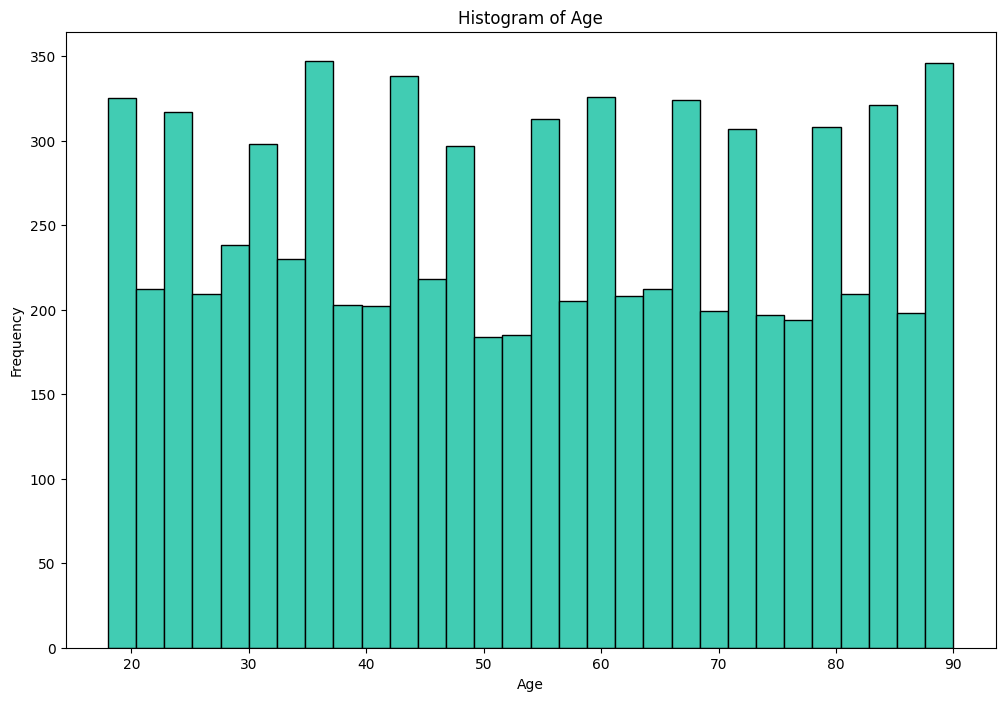

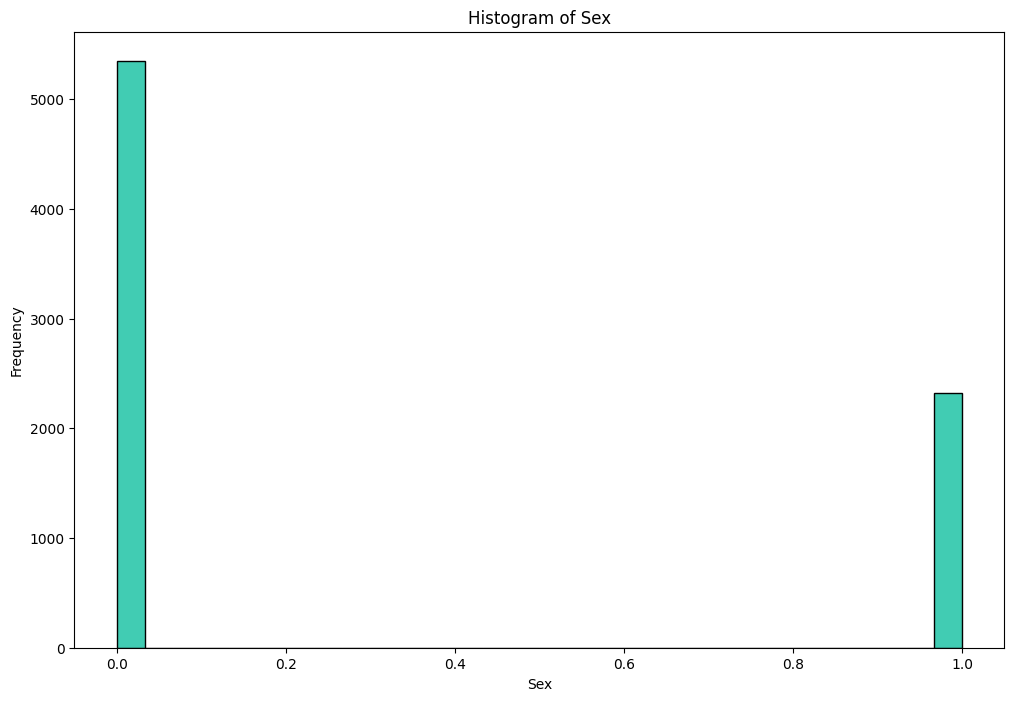

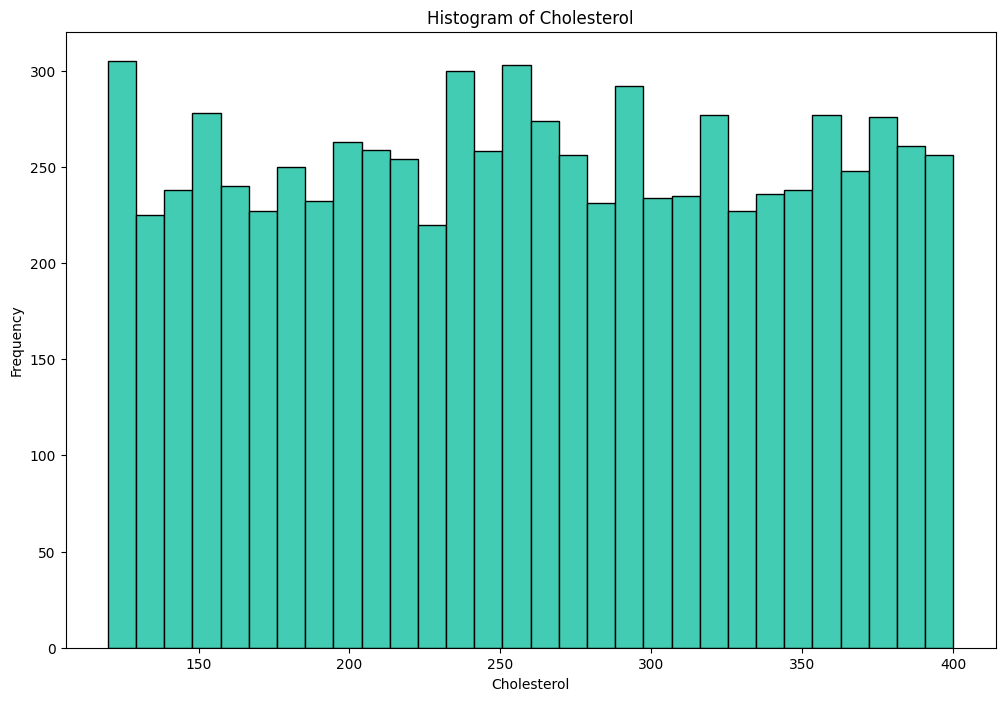

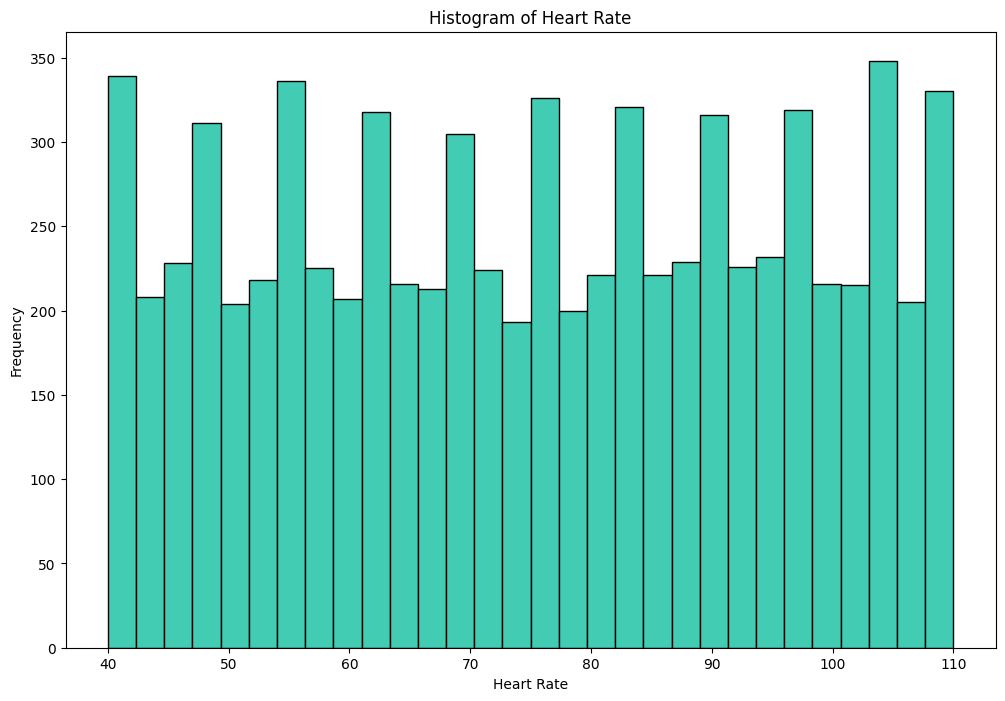

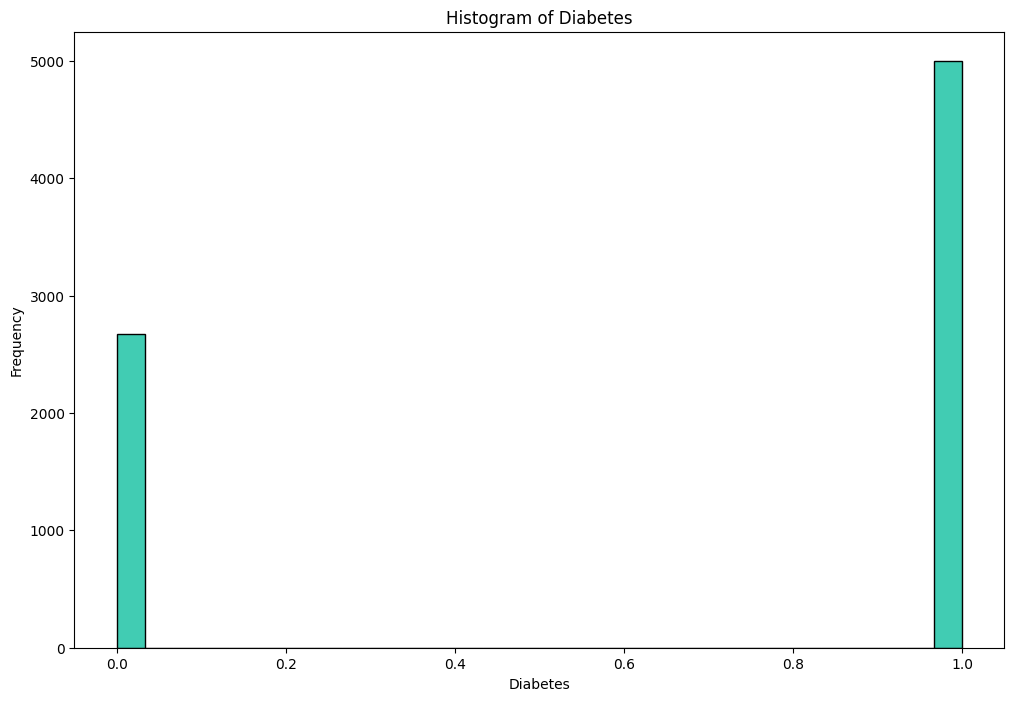

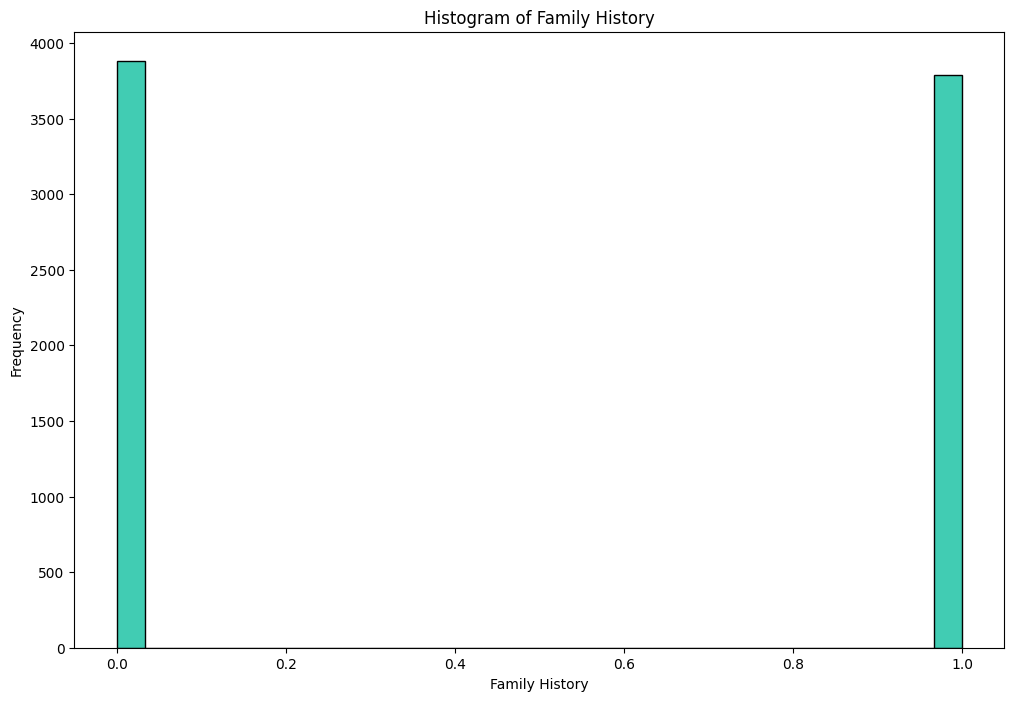

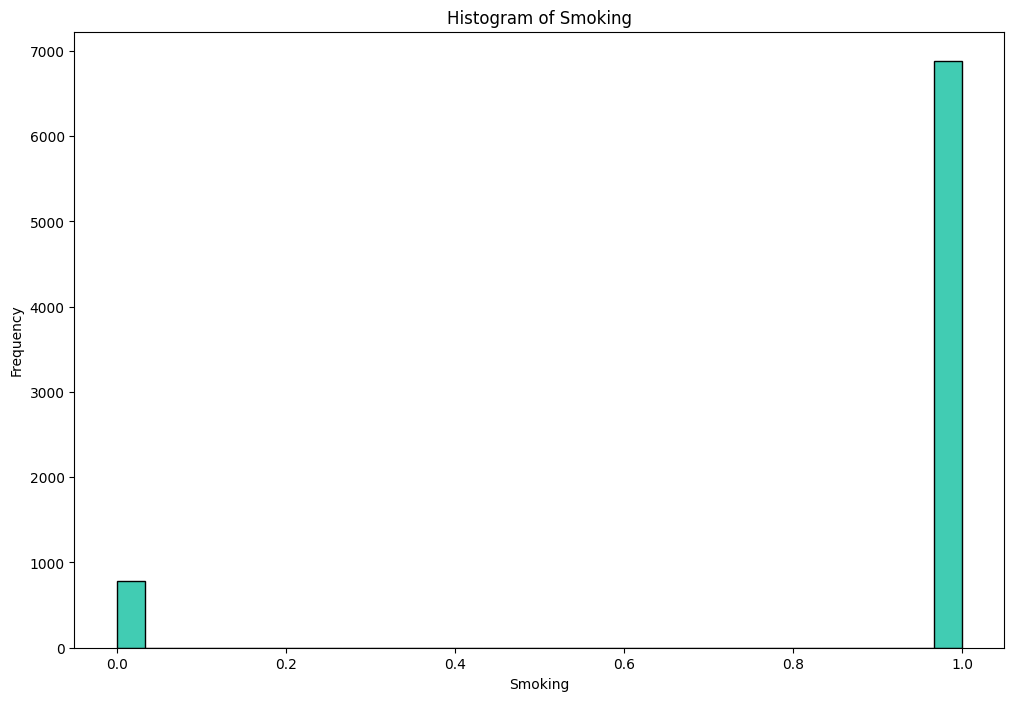

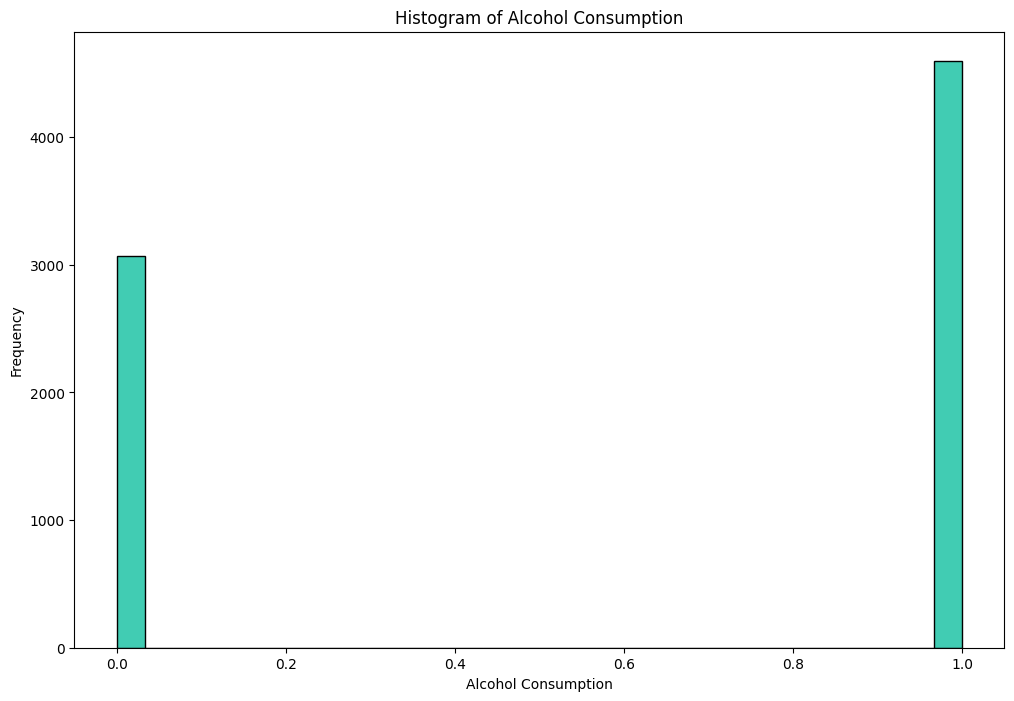

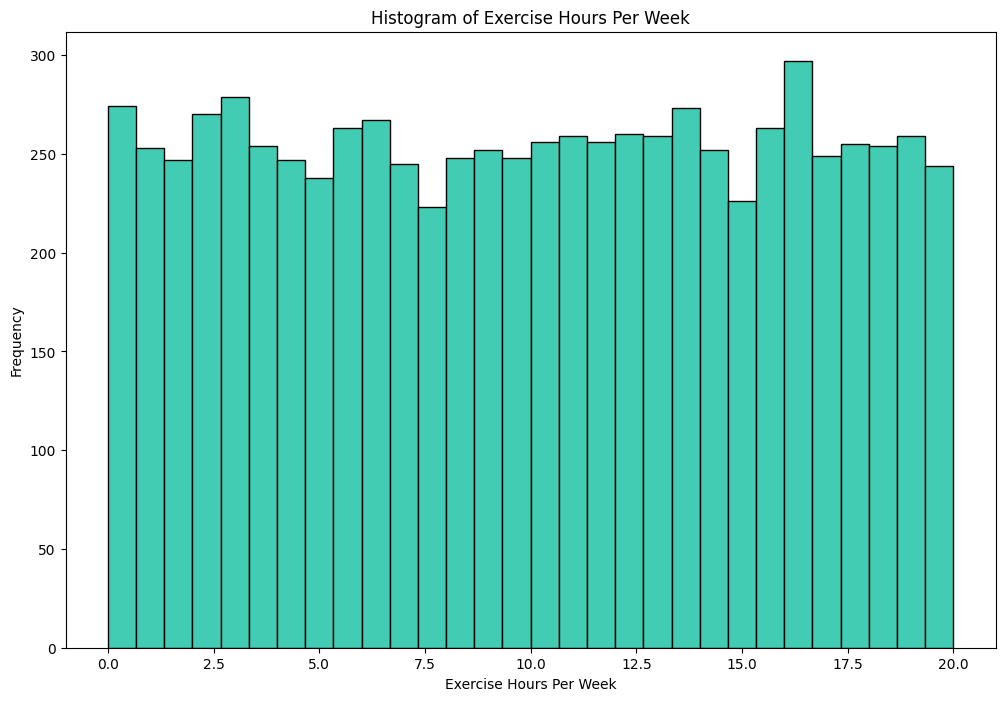

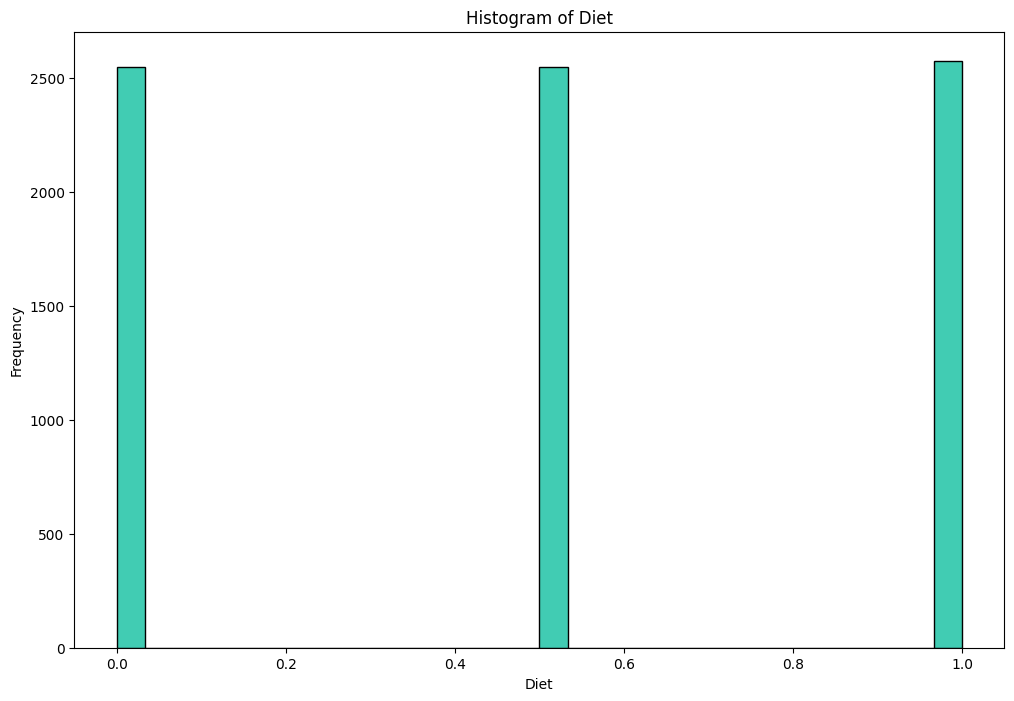

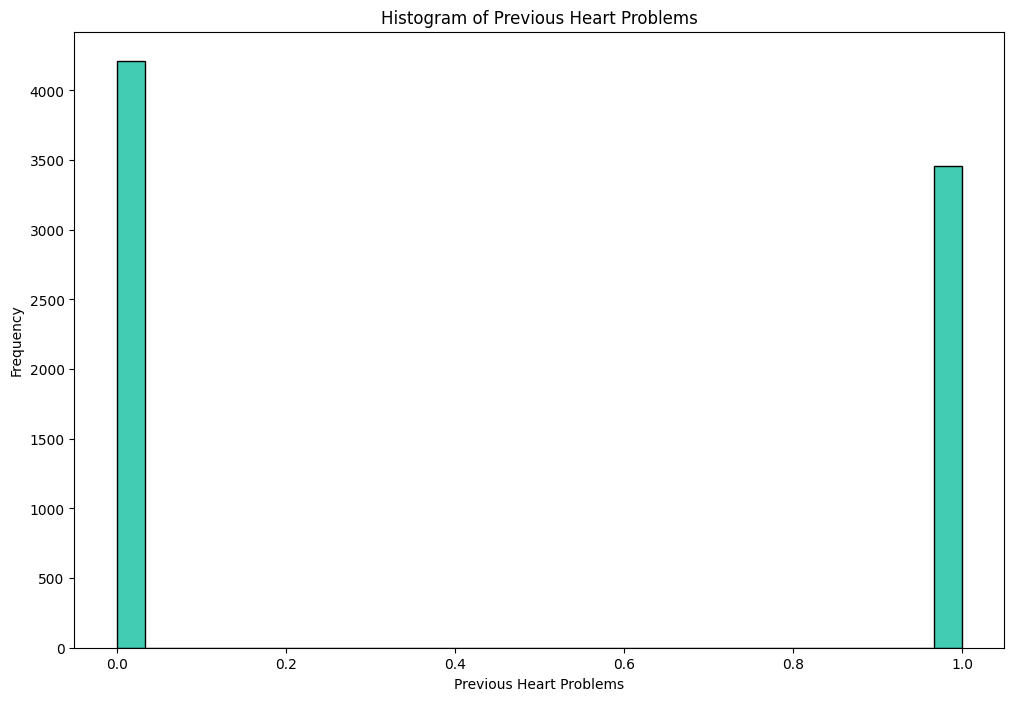

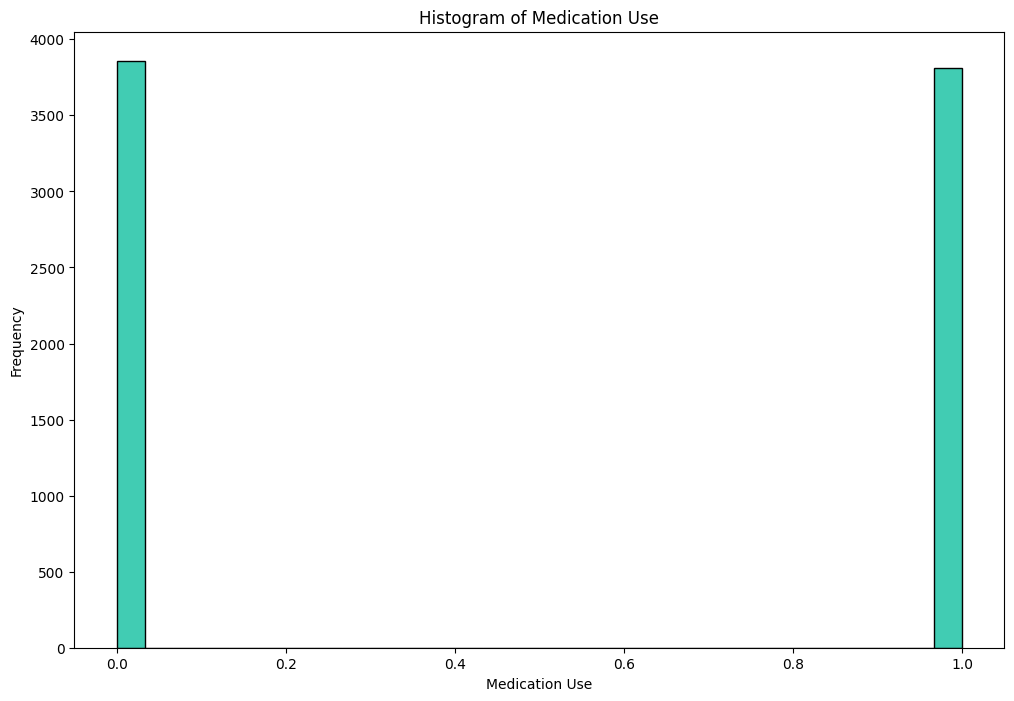

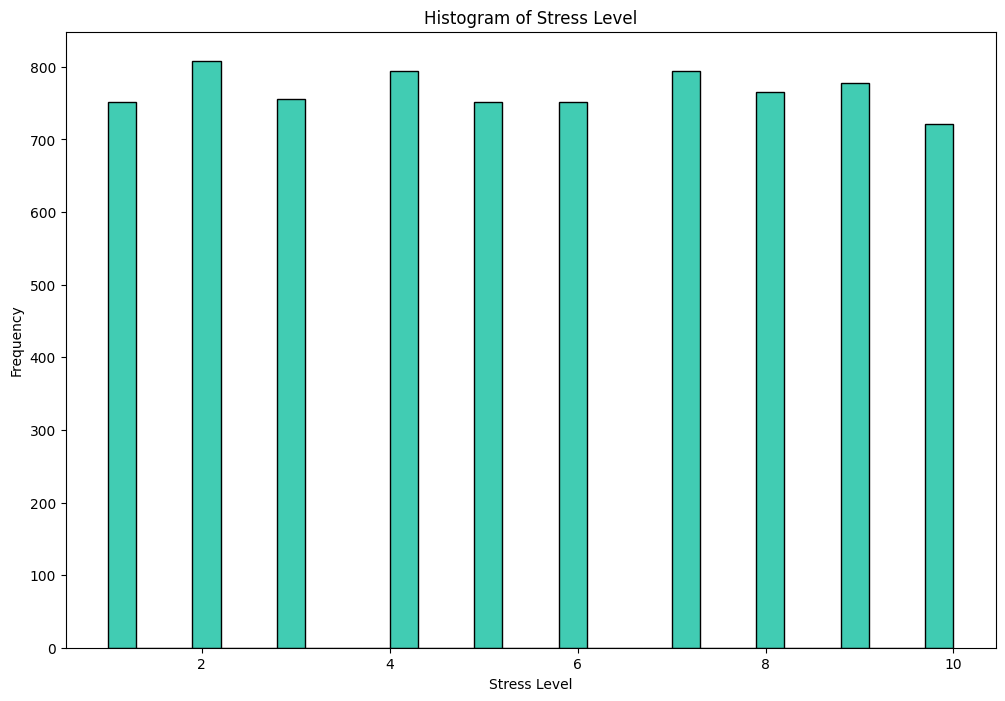

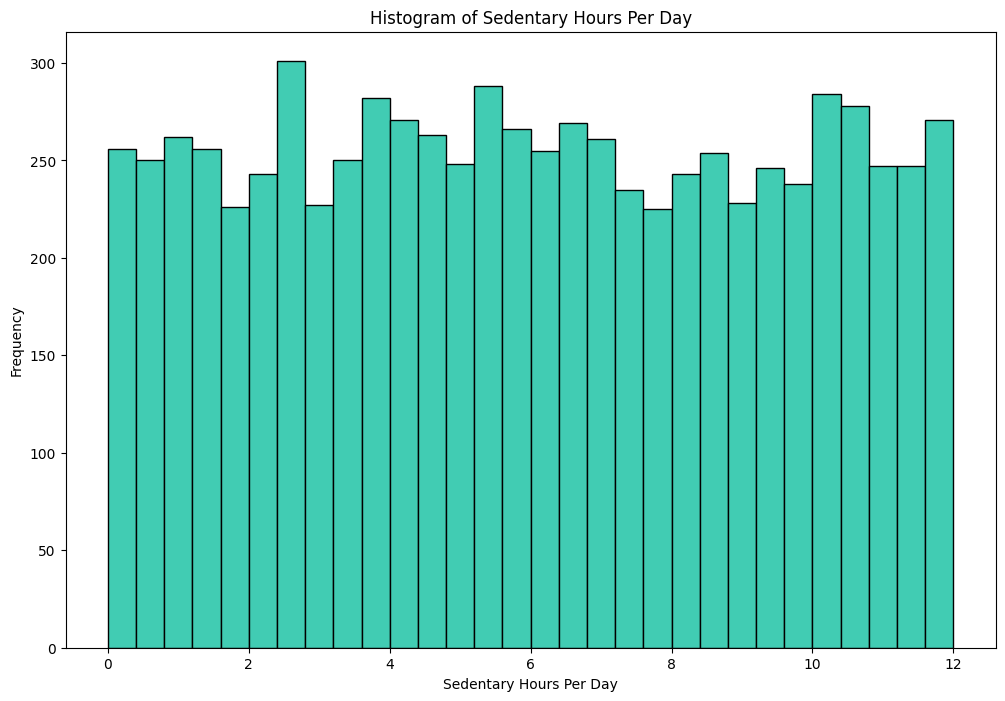

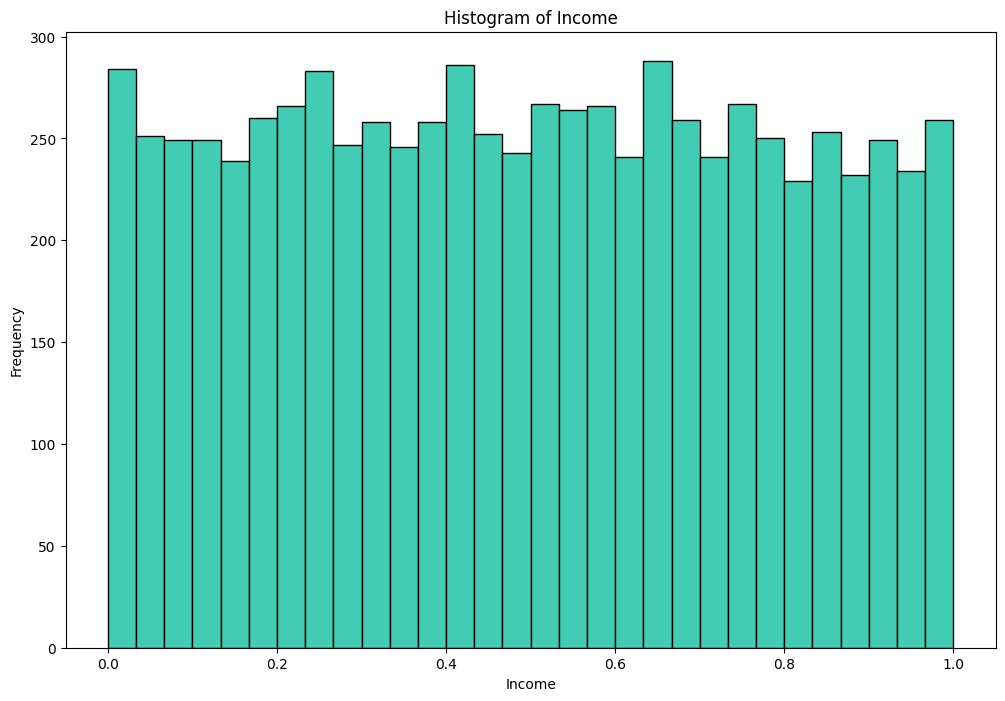

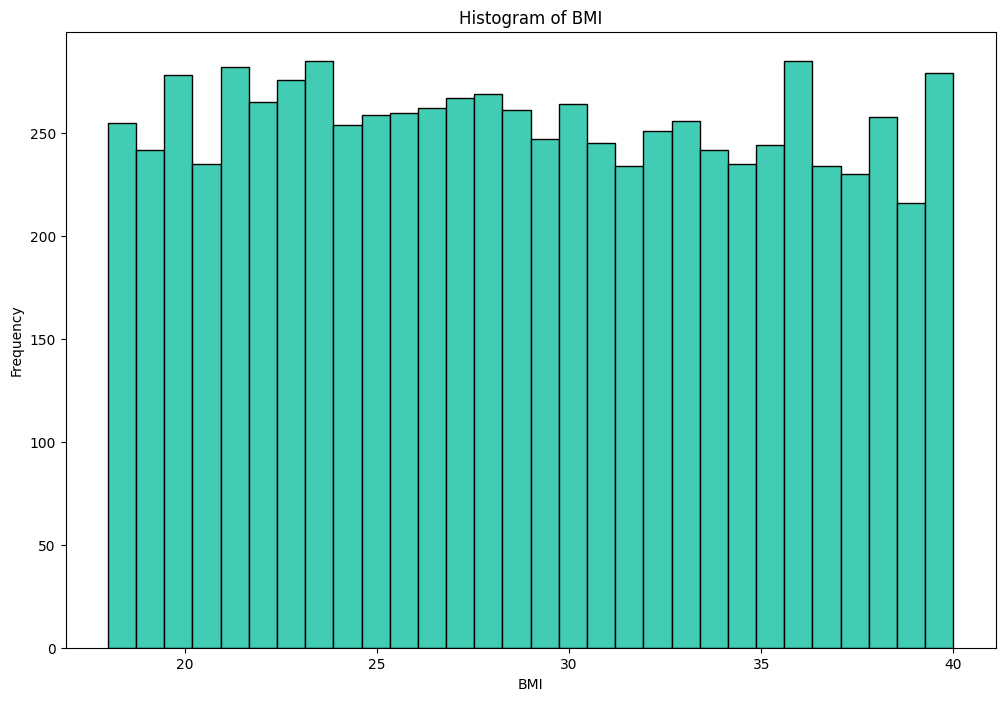

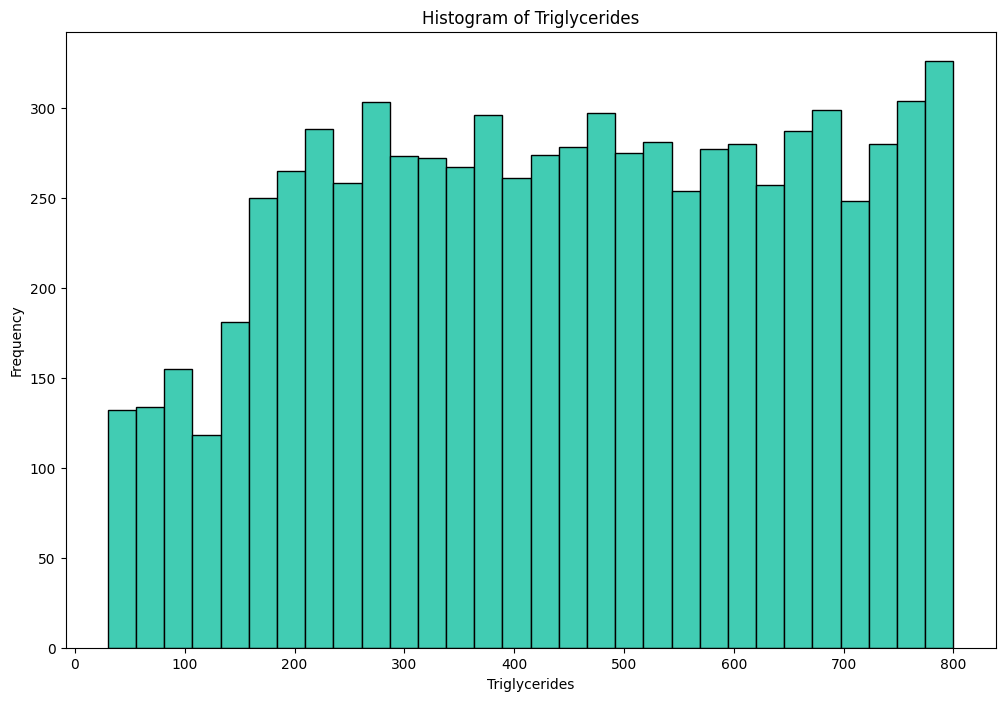

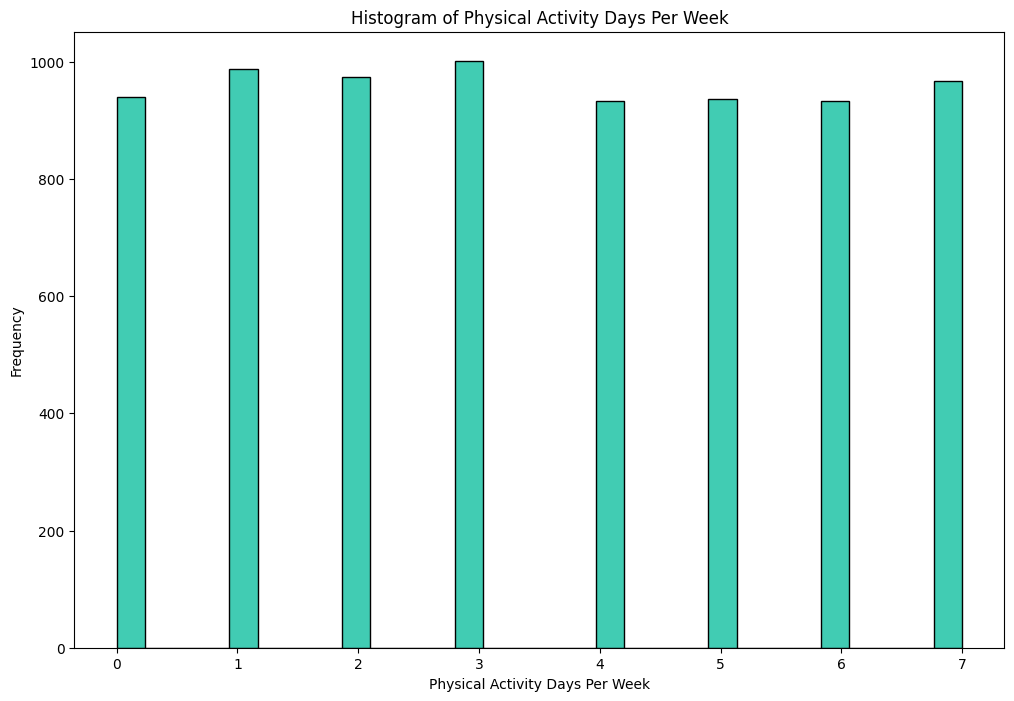

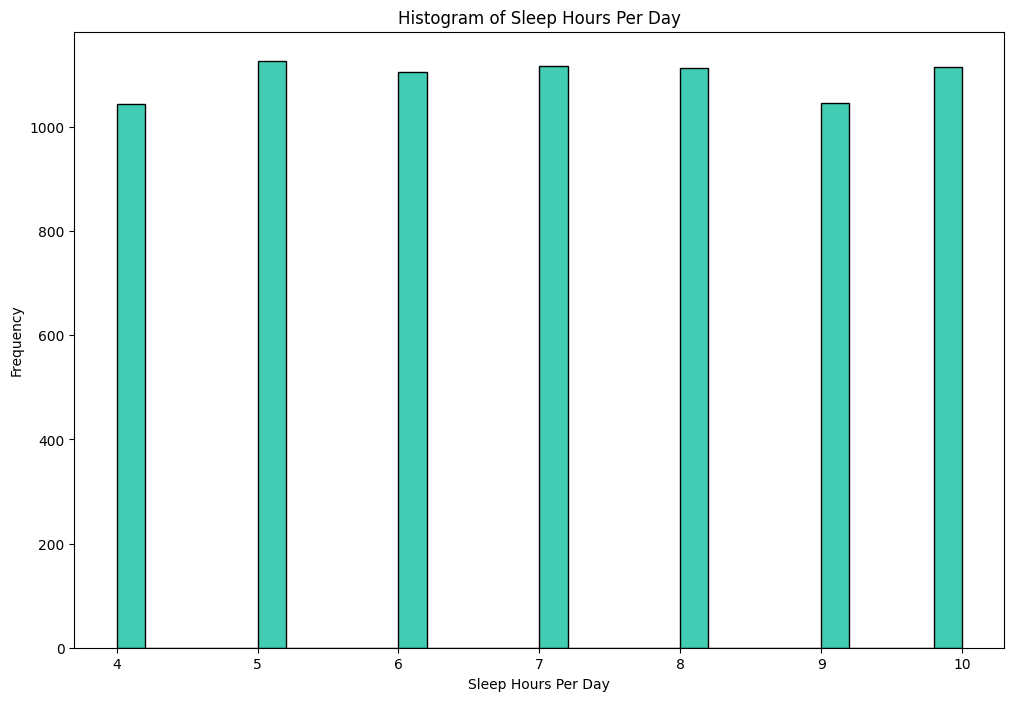

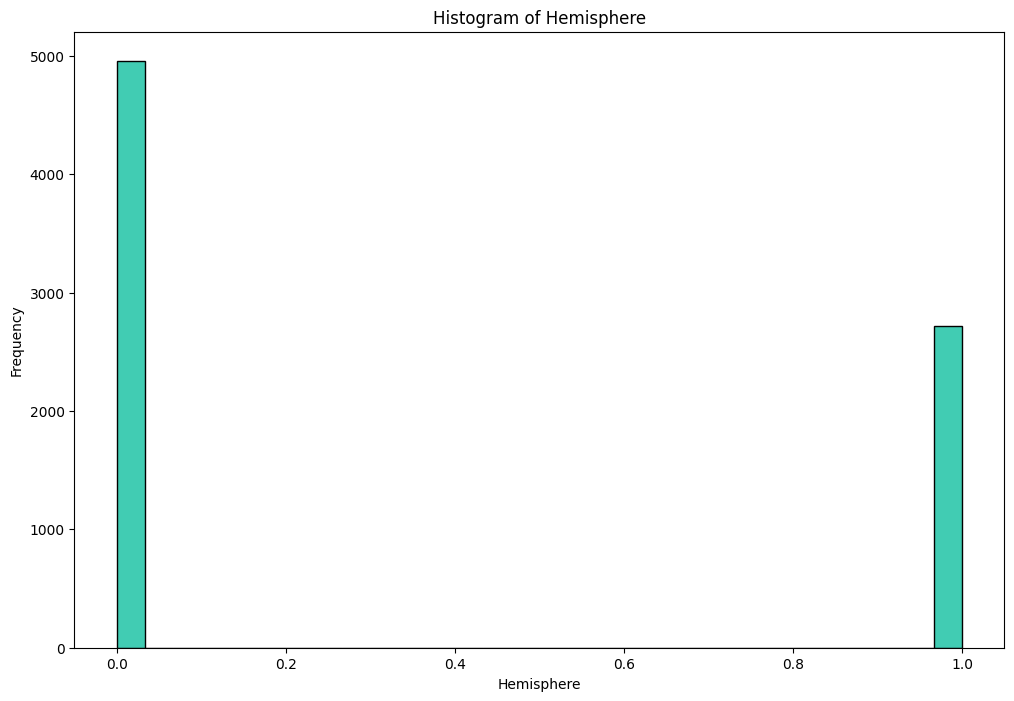

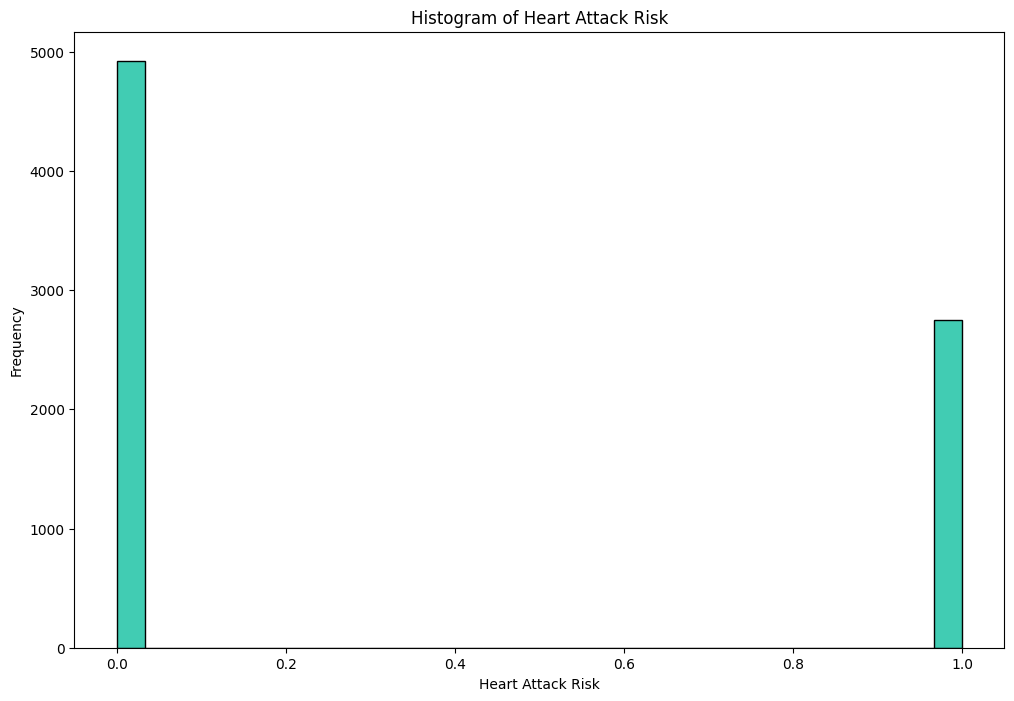

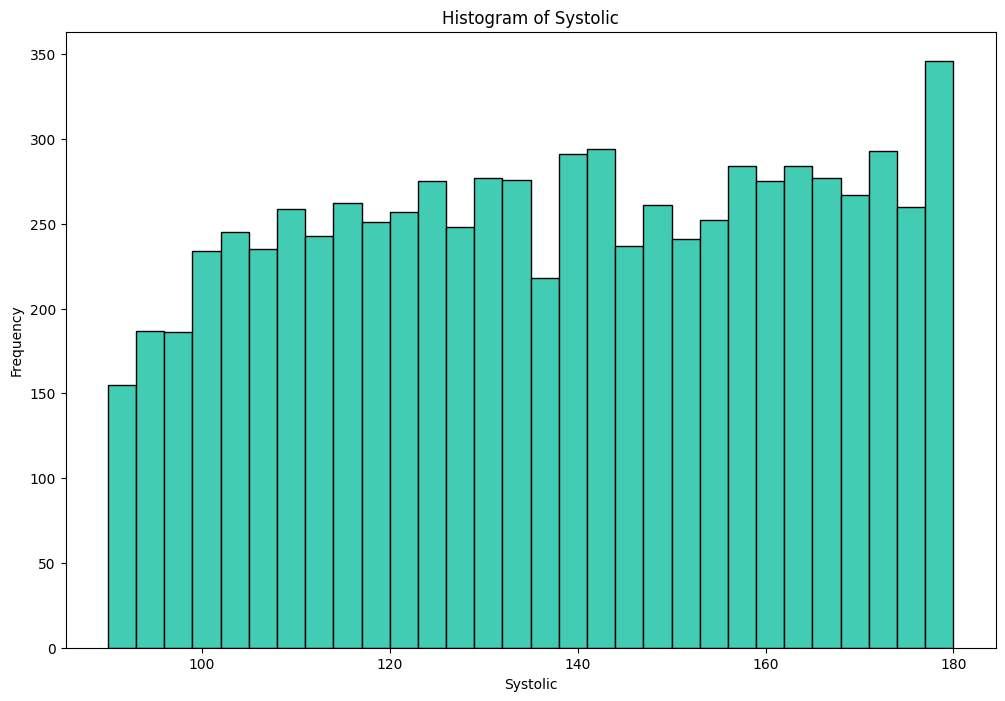

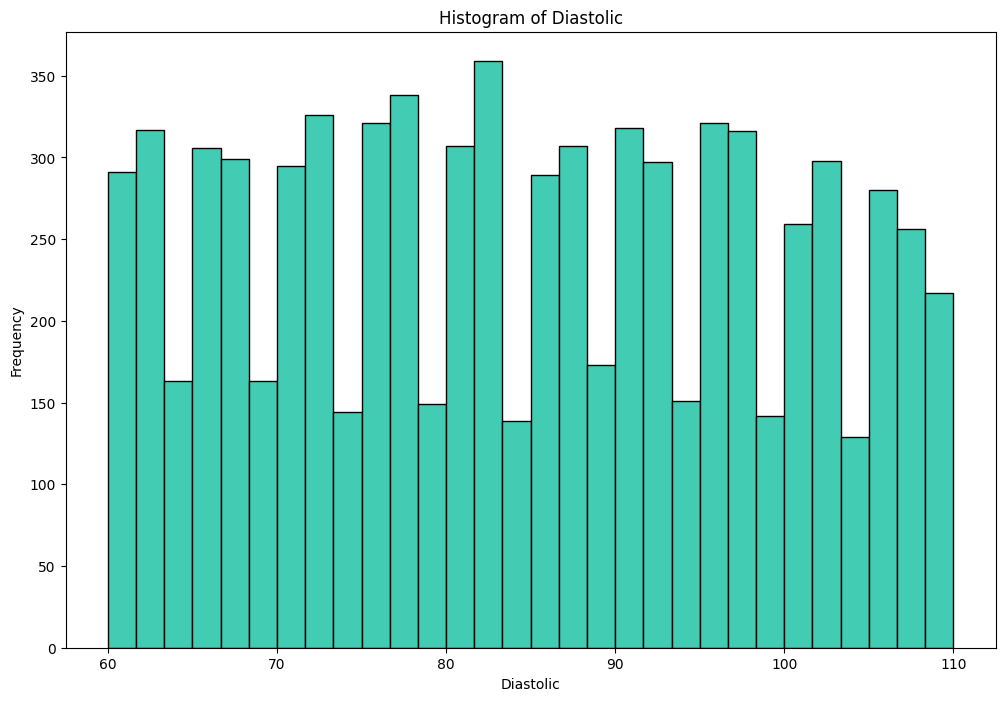

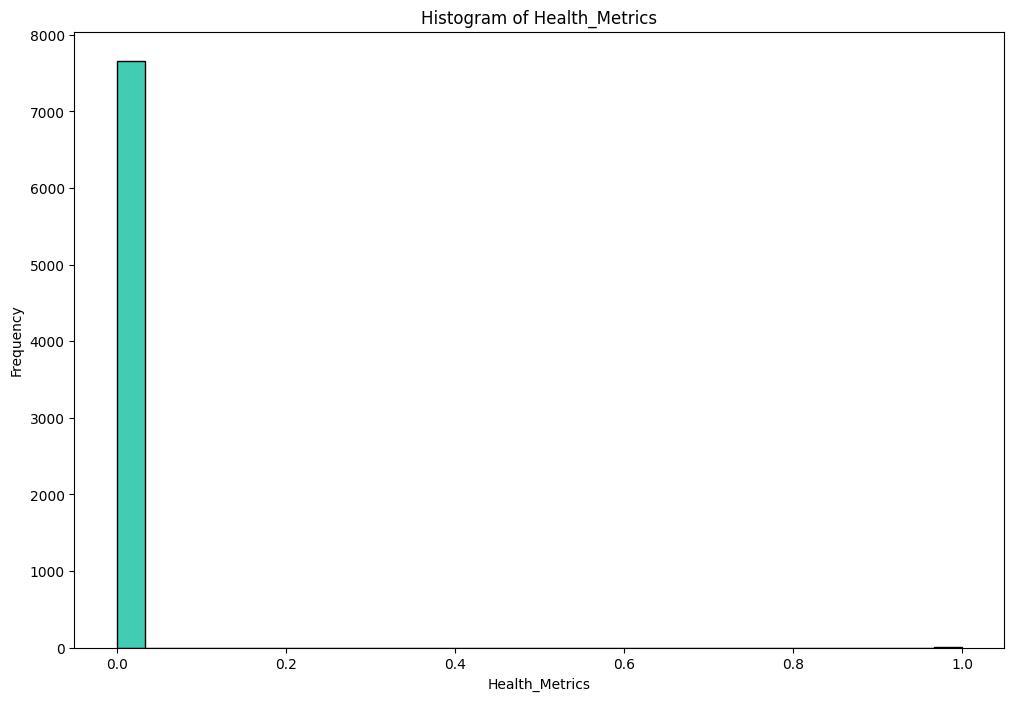

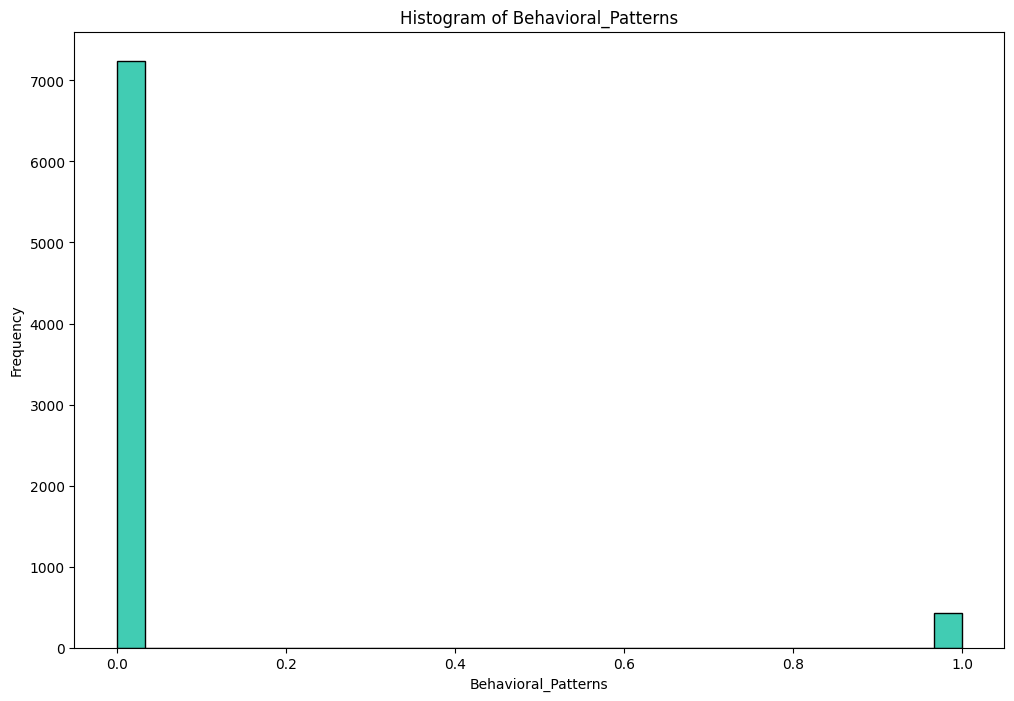

<ipython-input-41-255186d427de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


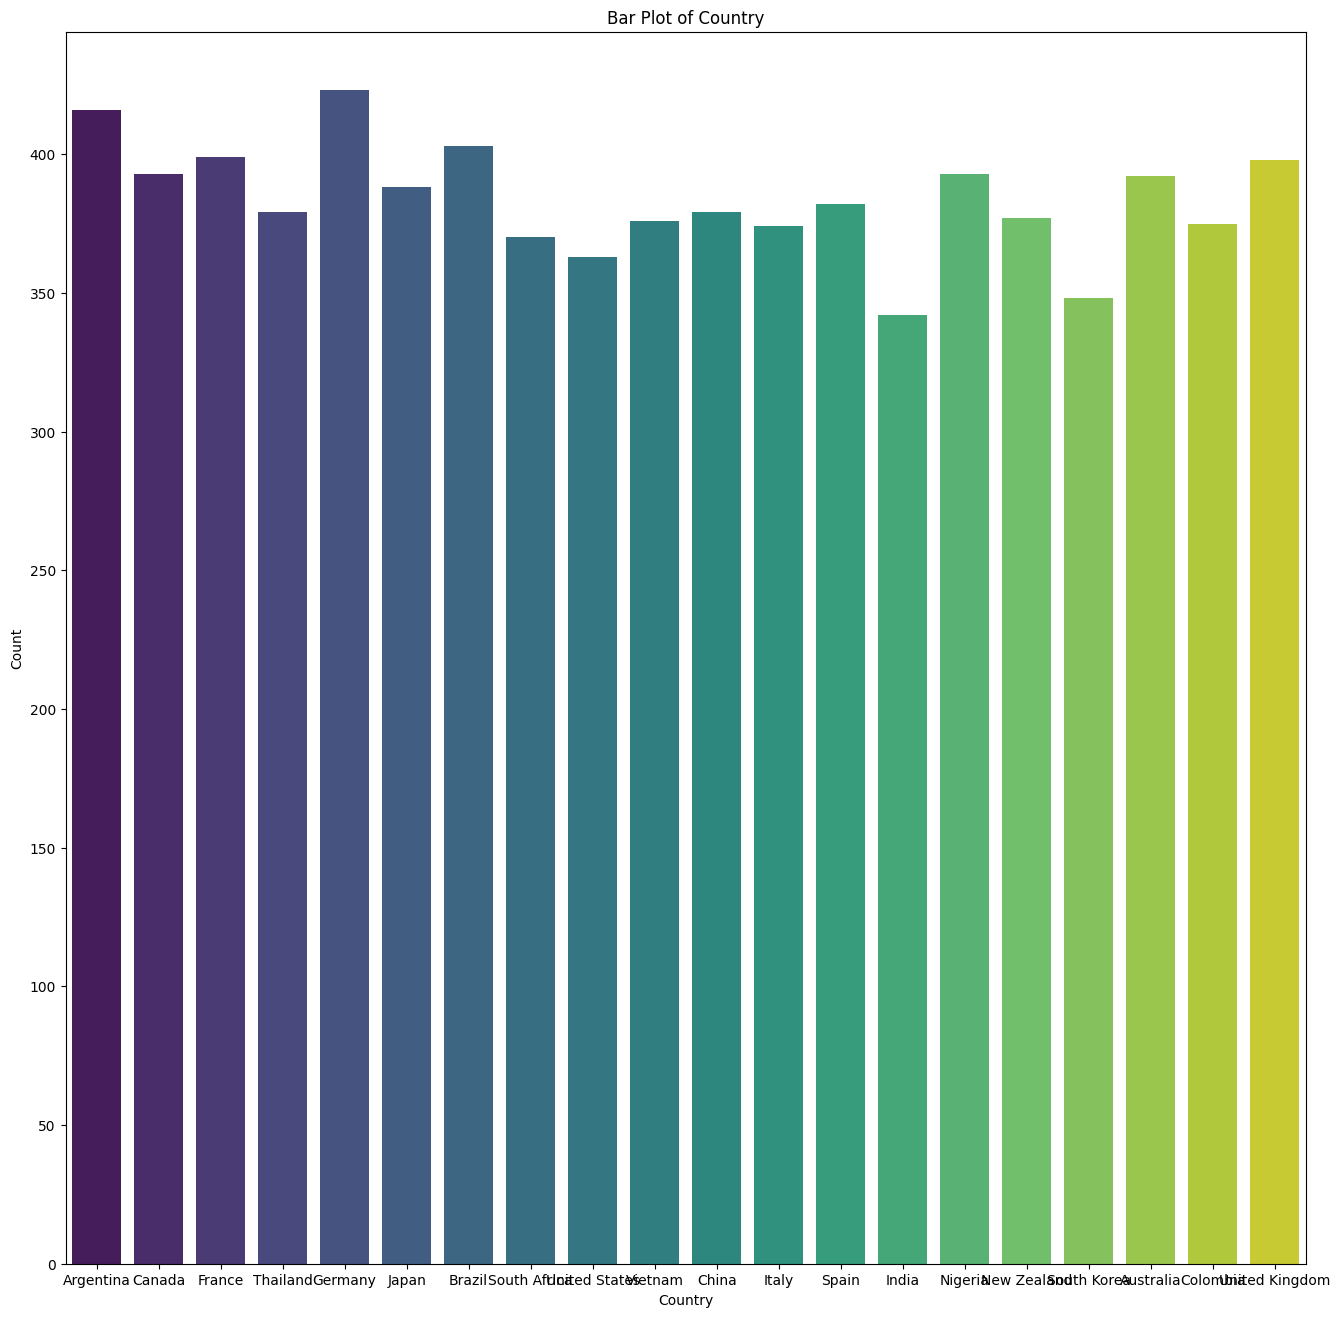

<ipython-input-41-255186d427de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


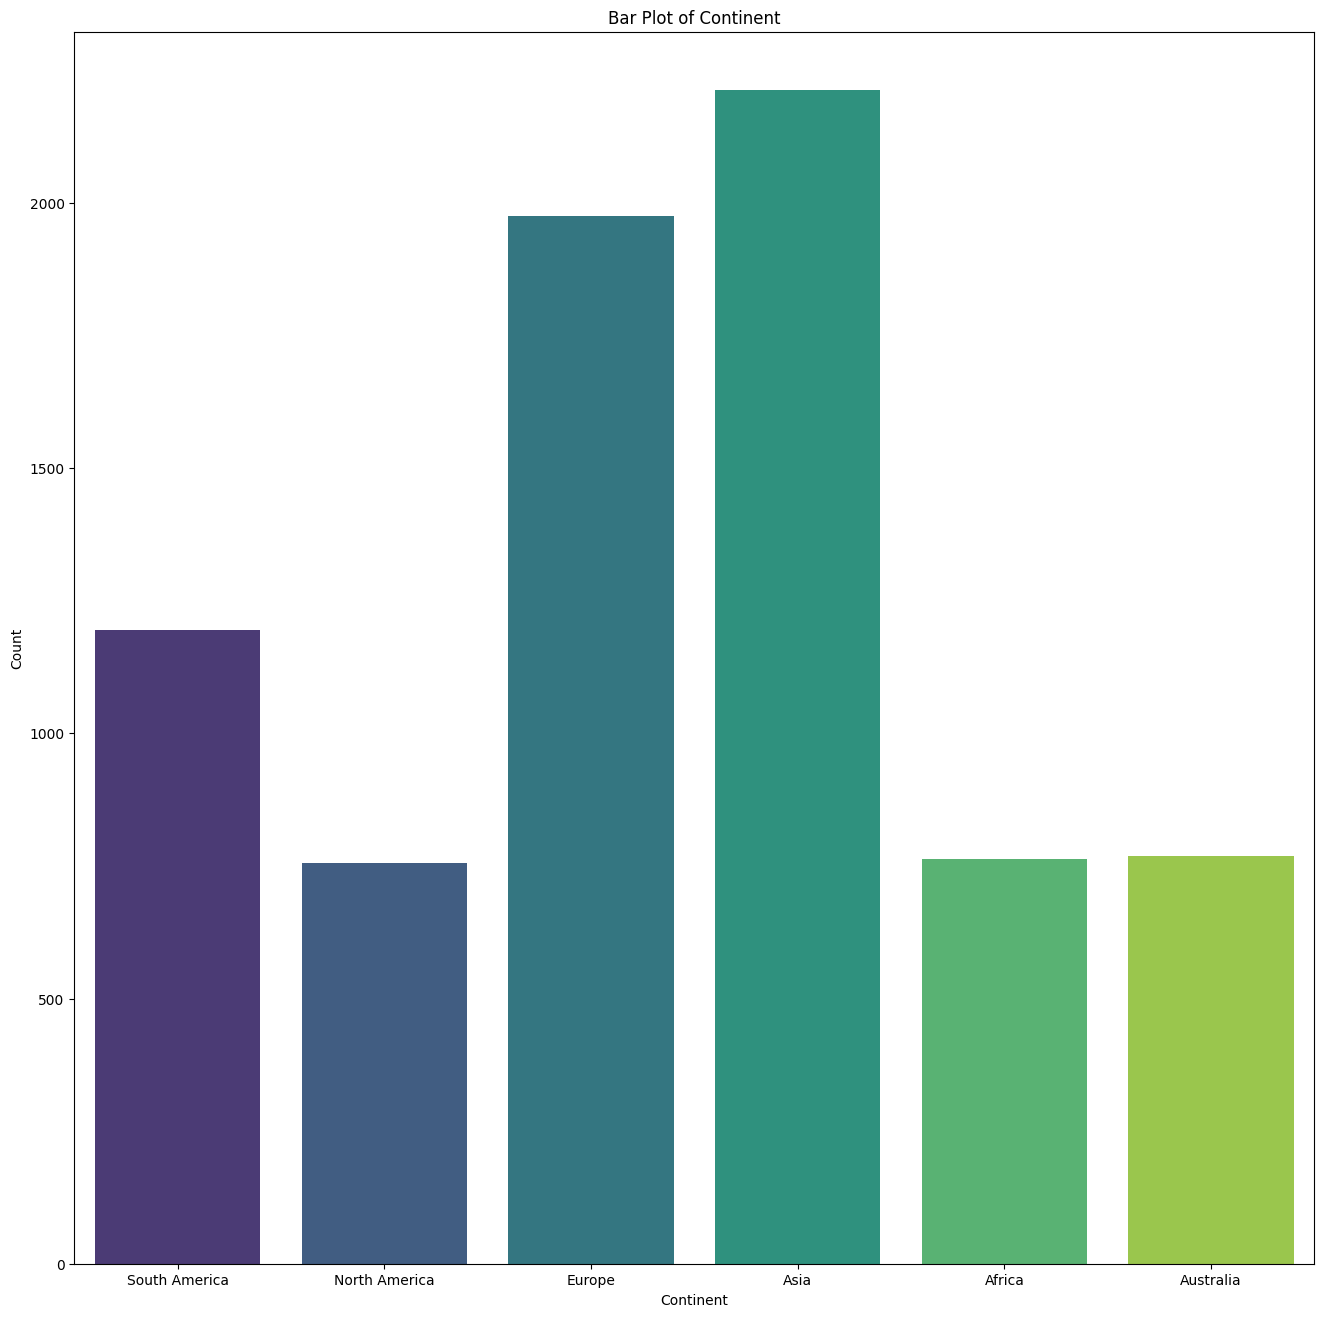

In [ ]:
columns_to_plot = [column for column in df.columns if column != "Patient ID"]

numerical_columns = df[columns_to_plot].select_dtypes(include=['number']).columns
categorical_columns = df[columns_to_plot].select_dtypes(include=['object']).columns

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(12, 8))
    plt.hist(df[column], bins=30, color='#41ccb3', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot bar plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(16, 16))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


<ipython-input-42-4b07a56a3de7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


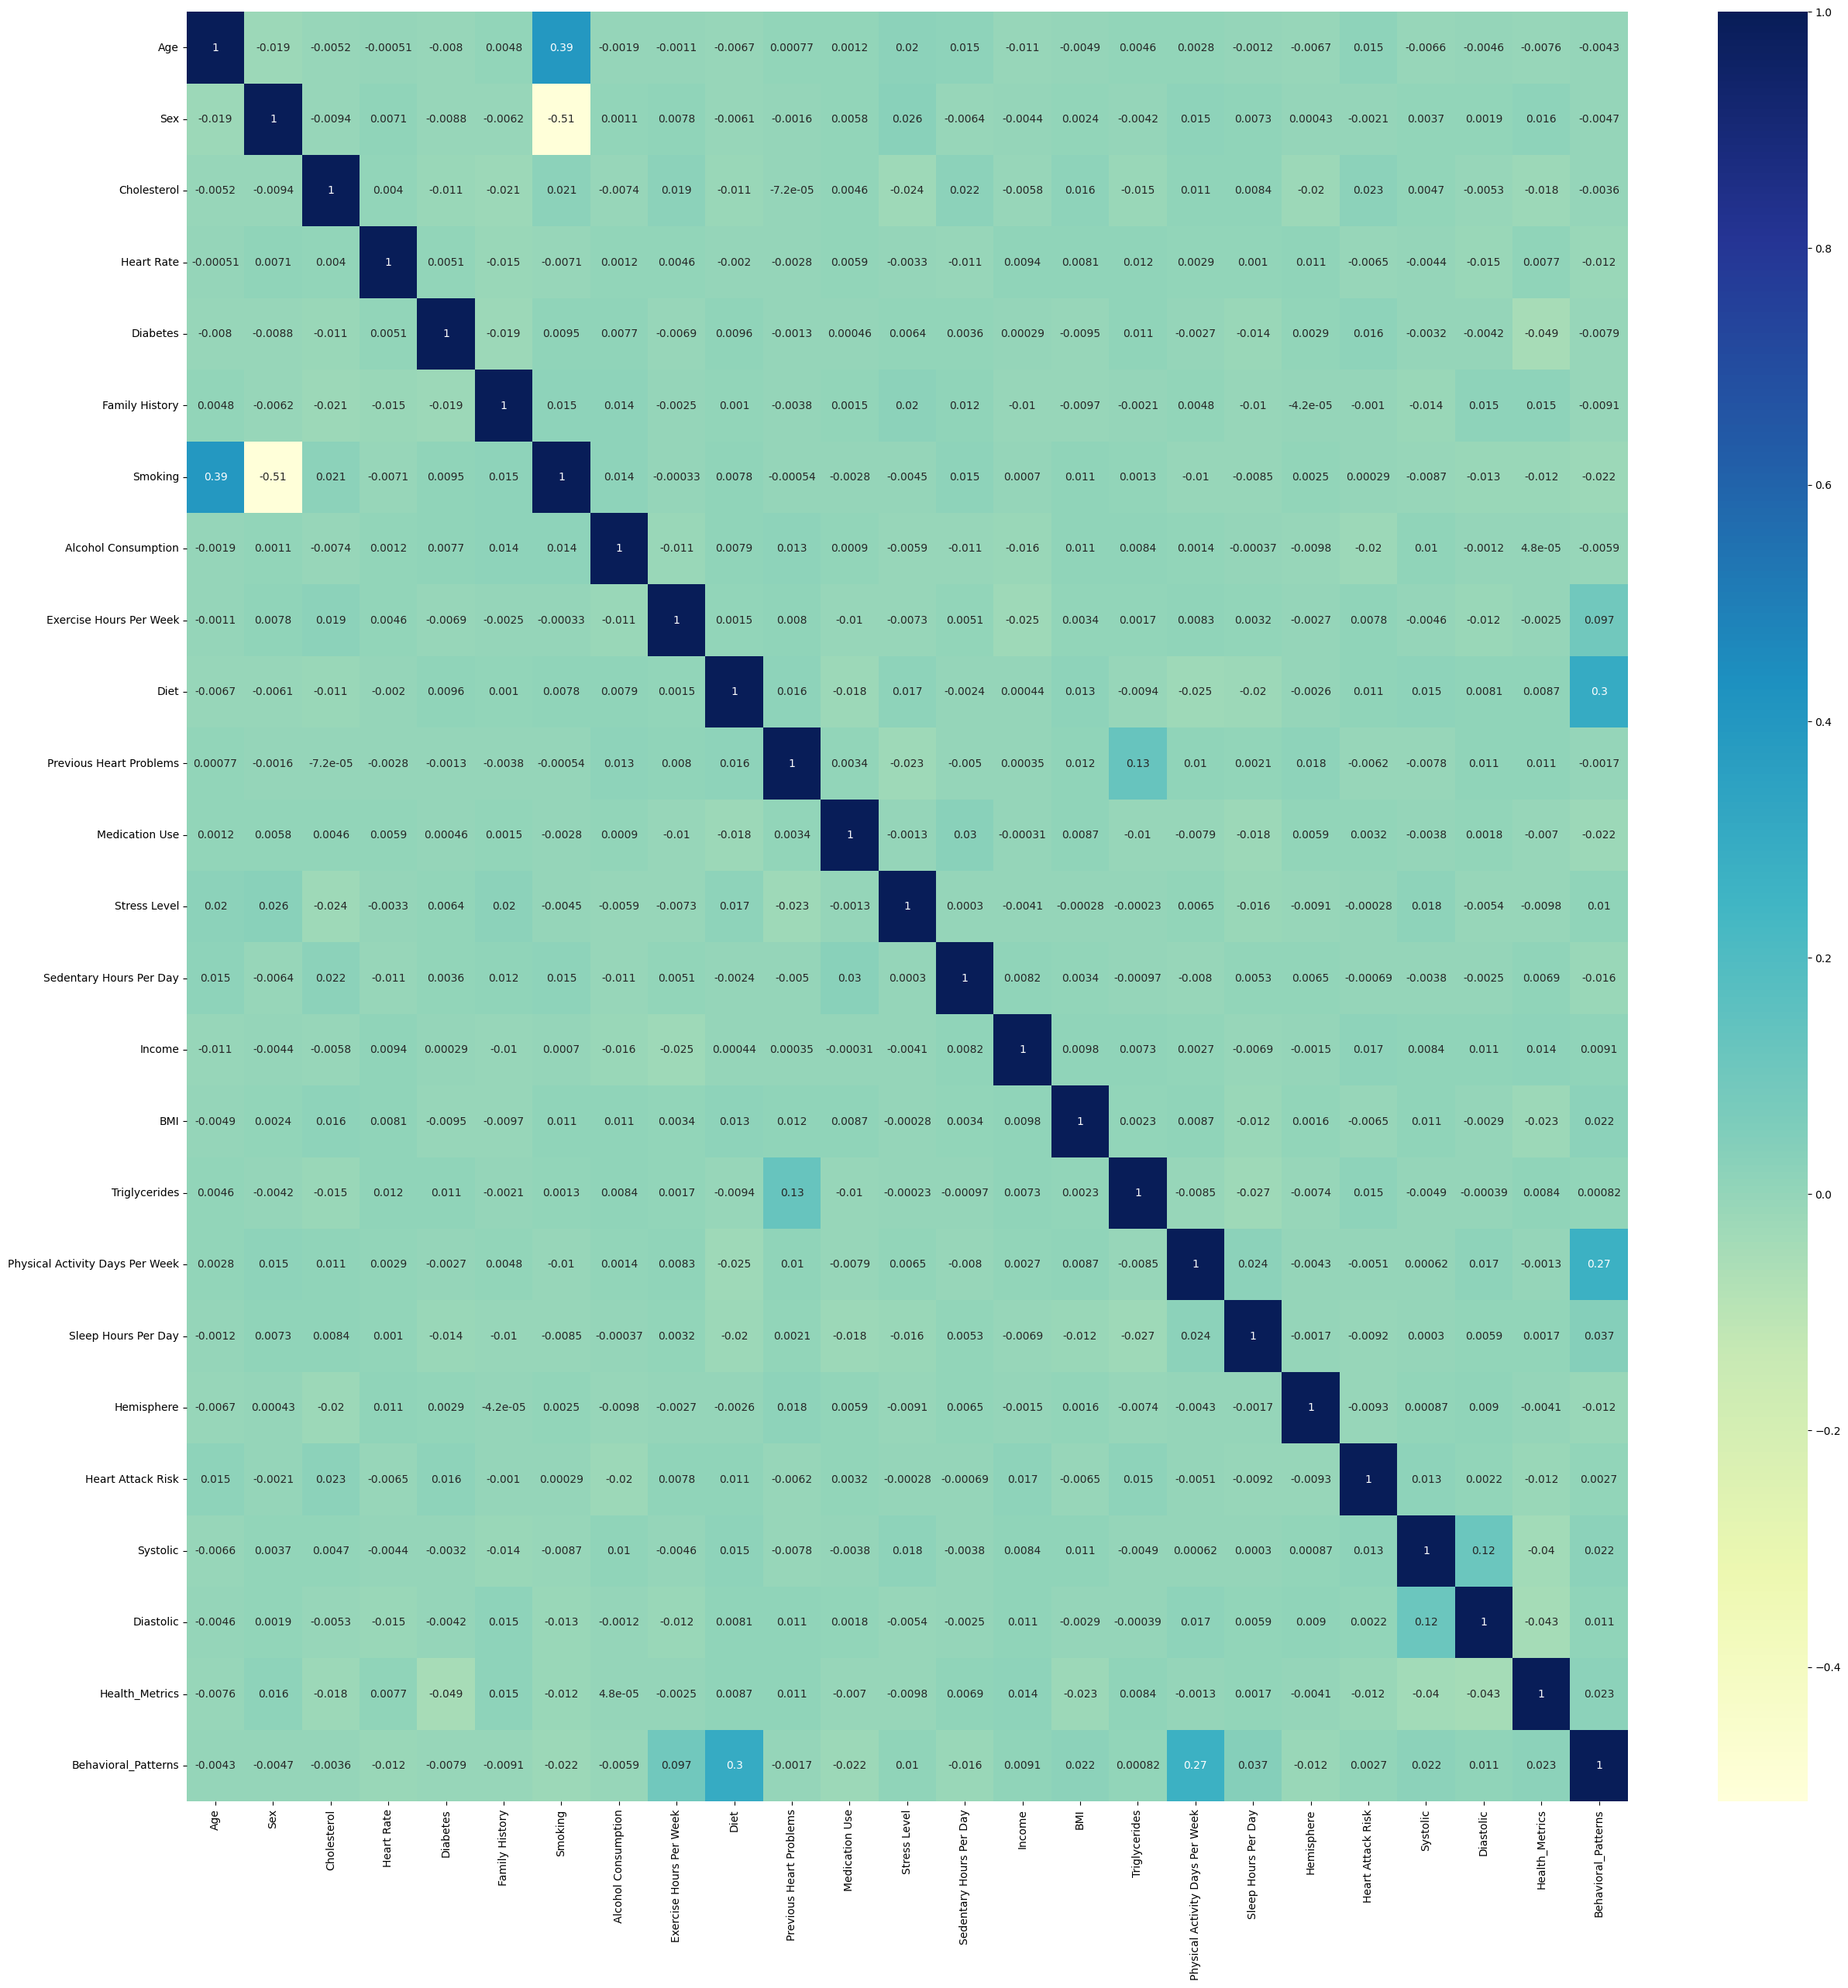

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 30))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

# **Second Phase**

In [ ]:
df_1 = df
df_1

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Health_Metrics,Behavioral_Patterns
0,BMW7812,67,0,208,72,0,0,1,0,4.168189,...,0,6,Argentina,South America,1,0,158,88,0,0
1,CZE1114,21,0,389,98,1,1,1,1,1.813242,...,1,7,Canada,North America,0,0,165,93,0,0
2,BNI9906,21,1,324,72,1,0,0,0,2.078353,...,4,4,France,Europe,0,0,174,99,0,0
3,JLN3497,84,0,383,73,1,1,1,1,9.828130,...,3,4,Canada,North America,0,0,163,100,0,0
4,GFO8847,66,0,318,93,1,1,1,0,5.804299,...,1,5,Thailand,Asia,0,0,91,88,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,BUE0416,22,0,347,108,0,1,1,1,3.820772,...,2,9,Canada,North America,0,1,115,87,0,0
8757,YDX2478,59,1,378,99,0,1,1,0,1.857908,...,1,9,China,Asia,0,0,93,78,0,0
8759,QSV6764,28,1,120,73,1,0,0,0,16.558426,...,4,9,Canada,North America,0,0,157,102,0,0
8760,XKA5925,47,0,250,105,0,1,1,1,3.148438,...,4,4,Brazil,South America,1,1,161,75,0,0


# Frequent Patterns for:

# *Sex & Heart Attack Risk*

In [ ]:
from mlxtend.frequent_patterns import apriori, fpgrowth

df_1['Sex'] = df['Sex'].map({0: 'Male', 1: 'Female'})
features = ['Sex', 'Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.302608,(Sex_Female)
2,0.697392,(Sex_Male)
3,0.107953,"(Sex_Female, Heart Attack Risk)"
4,0.250326,"(Sex_Male, Heart Attack Risk)"


# *Family History & Heart Attack Risk*

In [ ]:
df_1['Family History'] = df['Family History'].map({0: 'No', 1: 'Yes'})
features1 = ['Family History','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.505867,(Family History_No)
2,0.494133,(Family History_Yes)
3,0.181486,"(Family History_No, Heart Attack Risk)"
4,0.176793,"(Heart Attack Risk, Family History_Yes)"


# *Smoking & Heart Attack Risk*

In [ ]:
df_1['Smoking'] = df['Smoking'].map({0: 'No', 1: 'Yes'})
features1 = ['Smoking','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.102738,(Smoking_No)
2,0.897262,(Smoking_Yes)
3,0.321512,"(Smoking_Yes, Heart Attack Risk)"


# *Alcohol Consumption & Heart Attack Risk*

In [ ]:
df_1['Alcohol Consumption'] = df_1['Alcohol Consumption'].map({0: 'No', 1: 'Yes'})
features1 = ['Alcohol Consumption','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.400652,(Alcohol Consumption_No)
2,0.599348,(Alcohol Consumption_Yes)
3,0.148240,"(Alcohol Consumption_No, Heart Attack Risk)"
4,0.210039,"(Alcohol Consumption_Yes, Heart Attack Risk)"


# *Diet & Heart Attack Risk*

In [ ]:
df_1['Diet'] = df['Diet'].map({0: 'Unhealthy', 1: 'Healthy',  0.5: "Average"})
features1 = ['Diet','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.332464,(Diet_Average)
2,0.335593,(Diet_Healthy)
3,0.331943,(Diet_Unhealthy)
4,0.117080,"(Diet_Average, Heart Attack Risk)"
5,0.123468,"(Diet_Healthy, Heart Attack Risk)"
6,0.117731,"(Diet_Unhealthy, Heart Attack Risk)"


# *Age & Heart Attack Risk*

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels= ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

df_1['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=bin_labels, right=False, include_lowest=True)

features1 = ['Age_bins','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.02, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.028162,(Age_bins_10s)
2,0.141460,(Age_bins_20s)
3,0.140548,(Age_bins_30s)
4,0.137549,(Age_bins_40s)
5,0.131943,(Age_bins_50s)
6,0.136375,(Age_bins_60s)
7,0.130769,(Age_bins_70s)
8,0.135202,(Age_bins_80s)
9,0.052021,"(Heart Attack Risk, Age_bins_20s)"


# *Cholesterol & Heart Attack Risk*

In [ ]:
bins = [0, 200, 240, float('inf')]
bin_labels = ['Normal', 'High', 'Very High']

# Convert cholesterol to categorical bins
df_1['Cholesterol Category'] = pd.cut(df['Cholesterol'], bins=bins, labels=bin_labels, right=False)

features1 = ['Cholesterol Category','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.278618,(Cholesterol Category_Normal)
2,0.142243,(Cholesterol Category_High)
3,0.579140,(Cholesterol Category_Very High)
4,0.212777,"(Cholesterol Category_Very High, Heart Attack ..."


# *Systolic & Heart Attack Risk*

In [ ]:
bins = [0, 120, 140, 160, float('inf')]
bin_labels = ['Low', 'Normal', 'High', 'Very High']

# Convert systolic to categorical bins
df_1['Systolic Category'] = pd.cut(df['Systolic'], bins=bins, labels=bin_labels, right=False)

features1 = ['Systolic Category','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.294263,(Systolic Category_Low)
2,0.226336,(Systolic Category_Normal)
3,0.230378,(Systolic Category_High)
4,0.249022,(Systolic Category_Very High)
5,0.102868,"(Systolic Category_Low, Heart Attack Risk)"


# *Diastolic & Heart Attack Risk*

In [ ]:
bins = [0, 70, 80, 90, float('inf')]
bin_labels = ['Low', 'Normal', 'High', 'Very High']

df_1['Diastolic Category'] = pd.cut(df['Diastolic'], bins=bins, labels=bin_labels, right=False)

features1 = ['Diastolic Category','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.200652,(Diastolic Category_Low)
2,0.205085,(Diastolic Category_Normal)
3,0.205215,(Diastolic Category_High)
4,0.389048,(Diastolic Category_Very High)
5,0.140678,"(Diastolic Category_Very High, Heart Attack Risk)"


# *Exercise Routine & Heart Attack Risk*

In [ ]:
bins = [0, 4, 7, float('inf')]
bin_labels = ['Low', 'Medium', 'High']
df_1['Exercise Routine'] = pd.cut(df['Exercise Hours Per Week'], bins=bins, labels=bin_labels, right=False)

features1 = ['Exercise Routine','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.05, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.205606,(Exercise Routine_Low)
2,0.149804,(Exercise Routine_Medium)
3,0.644589,(Exercise Routine_High)
4,0.072881,"(Heart Attack Risk, Exercise Routine_Low)"
5,0.054107,"(Exercise Routine_Medium, Heart Attack Risk)"
6,0.231291,"(Heart Attack Risk, Exercise Routine_High)"


# *BMI & Heart Attack Risk*

In [ ]:
bins = [0, 18.5, 24.9, 29.9, float('inf')]
bin_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df_1['BMI Category'] = pd.cut(df['BMI'], bins=bins, labels=bin_labels, right=False)

features1 = ['BMI Category','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.297653,(BMI Category_Normal)
2,0.233768,(BMI Category_Overweight)
3,0.445111,(BMI Category_Obese)
4,0.111213,"(BMI Category_Normal, Heart Attack Risk)"
5,0.158801,"(BMI Category_Obese, Heart Attack Risk)"


# *Medication Use & Heart Attack Risk*

In [ ]:
df_1['Medication Use'] = df['Medication Use'].map({0: 'No', 1: 'Yes'})
features1 = ['Medication Use','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.502868,(Medication Use_No)
2,0.497132,(Medication Use_Yes)
3,0.179400,"(Medication Use_No, Heart Attack Risk)"
4,0.178879,"(Medication Use_Yes, Heart Attack Risk)"


# *Triglyceride & Heart Attack Risk*

In [ ]:
bins = [0, 150, 300, float('inf')]
labels = ['Normal', 'Borderline', 'High']
df_1['Triglyceride Category'] = pd.cut(df['Triglycerides'], bins=bins, labels=labels, right=False, include_lowest=True)

features1 = ['Triglyceride Category','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.208344,(Triglyceride Category_Borderline)
2,0.709909,(Triglyceride Category_High)
3,0.255411,"(Triglyceride Category_High, Heart Attack Risk)"


# *Stress Level & Heart Attack Risk*

In [ ]:
bins = [0, 3, 6, 11]
labels = ['Low', 'Medium', 'High']
df_1['Stress Level Category'] = pd.cut(df['Stress Level'], bins=bins, labels=labels, right=False)
features1 = ['Stress Level Category','Heart Attack Risk']
one_hot_encoded = pd.get_dummies(df_1[features1])
apriori(one_hot_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358279,(Heart Attack Risk)
1,0.203259,(Stress Level Category_Low)
2,0.300000,(Stress Level Category_Medium)
3,0.496741,(Stress Level Category_High)
4,0.108344,"(Stress Level Category_Medium, Heart Attack Risk)"
5,0.178488,"(Stress Level Category_High, Heart Attack Risk)"


In [ ]:
df_1.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7670 entries, 0 to 8762
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Patient ID                       7670 non-null   object  
 1   Age                              7670 non-null   int64   
 2   Sex                              7670 non-null   object  
 3   Cholesterol                      7670 non-null   int64   
 4   Heart Rate                       7670 non-null   int64   
 5   Diabetes                         7670 non-null   int64   
 6   Family History                   7670 non-null   object  
 7   Smoking                          7670 non-null   object  
 8   Alcohol Consumption              7670 non-null   object  
 9   Exercise Hours Per Week          7670 non-null   float64 
 10  Diet                             7670 non-null   object  
 11  Previous Heart Problems          7670 non-null   int64   
 12  Medica

# The Most Frequent Patterns

In [ ]:
categorical_features = df[['Age_bins', 'Cholesterol Category', 'Systolic Category', 'Diastolic Category', 'Exercise Routine','Medication Use',
                           'BMI Category', 'Triglyceride Category', 'Stress Level Category','Sex', 'Diet', 'Alcohol Consumption', 'Family History', 'Heart Attack Risk']]
categorical_features = pd.get_dummies(categorical_features)
frequent_itemsets = apriori(categorical_features, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
filtered_df = frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.3) ]
filtered_df.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
39,0.494915,"(Triglyceride Category_High, Sex_Male)",2
25,0.457888,"(Triglyceride Category_High, Exercise Routine_...",2
27,0.449022,"(Sex_Male, Exercise Routine_High)",2
40,0.429335,"(Alcohol Consumption_Yes, Triglyceride Categor...",2
44,0.417731,"(Alcohol Consumption_Yes, Sex_Male)",2
20,0.407823,"(Cholesterol Category_Very High, Triglyceride ...",2
21,0.406649,"(Cholesterol Category_Very High, Sex_Male)",2
28,0.384876,"(Alcohol Consumption_Yes, Exercise Routine_High)",2
19,0.378096,"(Cholesterol Category_Very High, Exercise Rout...",2
41,0.360756,"(Family History_No, Triglyceride Category_High)",2


# **Clustering**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# categorical_features = df[['Age_bins', 'Cholesterol Category', 'Systolic Category', 'Diastolic Category', 'Exercise Routine',
#                            'BMI Category', 'Triglyceride Category', 'Stress Level Category', 'Diet', 'Alcohol Consumption', 'Heart Attack Risk']]
# categorical_features = df[['Cholesterol Category', 'Systolic Category', 'Diastolic Category',
                          #  'BMI Category', 'Triglyceride Category', 'Stress Level Category', 'Alcohol Consumption', 'Heart Attack Risk']]
categorical_features = df[['Cholesterol Category',
                           'BMI Category', 'Triglyceride Category', 'Stress Level Category', 'Alcohol Consumption', 'Heart Attack Risk']]

# One-hot encode categorical features
preprocessed_data = pd.get_dummies(categorical_features)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# *Kmeans, K=4*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


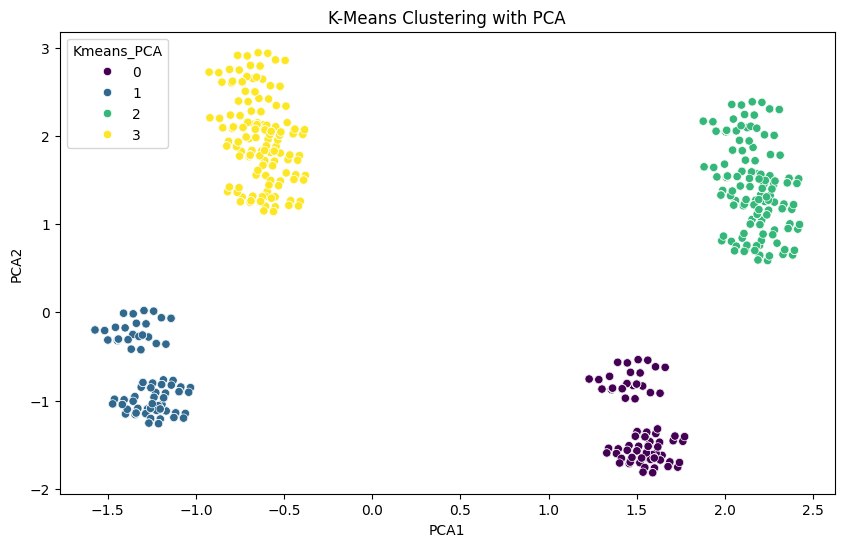

Silhouette Score (PCA): 0.793461025096744


In [ ]:
scaler = StandardScaler()
preprocessed_data_scaled = scaler.fit_transform(preprocessed_data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(preprocessed_data_scaled)

# Add PCA components to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
k = 4

# Apply k-means clustering on PCA components
kmeans_pca = KMeans(n_clusters=k, random_state=42)
df['Kmeans_PCA'] = kmeans_pca.fit_predict(pca_result)

# Explore the resulting clusters
cluster_centers_pca = pca.inverse_transform(kmeans_pca.cluster_centers_)
cluster_centers_pca_df = pd.DataFrame(cluster_centers_pca, columns=preprocessed_data.columns)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Kmeans_PCA', data=df, palette='viridis')
plt.title('K-Means Clustering with PCA')
plt.show()

# Calculate silhouette score for PCA-based clustering
silhouette_avg_pca = silhouette_score(pca_result, df['Kmeans_PCA'])
print(f"Silhouette Score (PCA): {silhouette_avg_pca}")

# *Explore (KMeans) Clusters To Find Patterns In Each Cluster*

In [ ]:
cluster_centers_pca_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Heart Attack Risk,Cholesterol Category_Normal,Cholesterol Category_High,Cholesterol Category_Very High,BMI Category_Underweight,BMI Category_Normal,BMI Category_Overweight,BMI Category_Obese,Triglyceride Category_Normal,Triglyceride Category_Borderline,Triglyceride Category_High,Stress Level Category_Low,Stress Level Category_Medium,Stress Level Category_High,Alcohol Consumption_No,Alcohol Consumption_Yes
0,0.042971,0.218355,0.154213,-0.307393,-0.007798,0.086332,0.020666,-0.094650,-0.164362,-0.487280,0.535314,-0.054713,-0.050817,0.090612,1.183085,-1.183085
1,-0.032710,0.073443,0.041791,-0.096261,-0.011538,-0.072428,0.027531,0.046704,-0.256413,-0.500593,0.602803,0.062396,-0.077217,0.020551,-0.822924,0.822924
2,0.051242,-0.233338,-0.144033,0.313796,0.026698,0.116776,-0.064481,-0.060656,0.589991,1.214351,-1.442962,-0.107988,0.178167,-0.076380,1.250832,-1.250832
3,-0.024504,-0.381015,-0.258305,0.528749,0.023148,-0.042047,-0.058087,0.081100,0.502065,1.210630,-1.386548,0.008994,0.153021,-0.147488,-0.757767,0.757767


# *DBScan*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


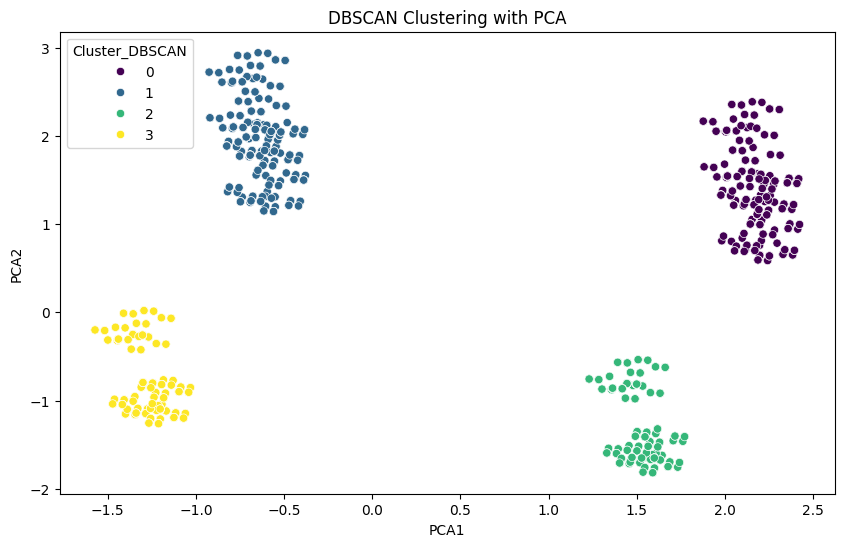

Silhouette Score (DBSCAN): 0.7934610250899634


In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

# Apply the pipeline to the data
pca_result = pipe.fit_transform(preprocessed_data)


# Add PCA components to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Apply DBSCAN clustering on PCA components
dbscan = DBSCAN(eps=0.5, min_samples=16)  # You may need to adjust eps and min_samples
df['Cluster_DBSCAN'] = dbscan.fit_predict(pca_result)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_DBSCAN', data=df, palette='viridis')
plt.title('DBSCAN Clustering with PCA')
plt.show()

# Calculate silhouette score for DBSCAN-based clustering
silhouette_avg_dbscan = silhouette_score(pca_result, df['Cluster_DBSCAN'])
print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")


# *Explore (DBScan) Clusters To Find Patterns In Each Cluster*

In [ ]:
cluster_counts_dbscan = df['Cluster_DBSCAN'].value_counts()
cluster_centers_dbscan = pd.DataFrame(columns=preprocessed_data.columns)

for cluster_label in cluster_counts_dbscan.index:
    if cluster_label != -1:  # Exclude noise points
        cluster_mask = (df['Cluster_DBSCAN'] == cluster_label)
        cluster_center = preprocessed_data.loc[cluster_mask].mean()
        cluster_centers_dbscan = cluster_centers_dbscan.append(cluster_center, ignore_index=True)

cluster_centers_dbscan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-65-aa46289dddd9>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_centers_dbscan = cluster_centers_dbscan.append(cluster_center, ignore_index=True)
<ipython-input-65-aa46289dddd9>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_centers_dbscan = cluster_centers_dbscan.append(cluster_center, ignore_index=True)
<ipython-input-65-aa46289dddd9>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

,Heart Attack Risk,Cholesterol Category_Normal,Cholesterol Category_High,Cholesterol Category_Very High,BMI Category_Underweight,BMI Category_Normal,BMI Category_Overweight,BMI Category_Obese,Triglyceride Category_Normal,Triglyceride Category_Borderline,Triglyceride Category_High,Stress Level Category_Low,Stress Level Category_Medium,Stress Level Category_High,Alcohol Consumption_No,Alcohol Consumption_Yes
0,0.351959,0.279988,0.143638,0.576374,0.021561,0.289705,0.236562,0.452171,0.000000,0.000000,1.0,0.213787,0.294868,0.491345,0.0,1.0
1,0.371747,0.277416,0.151022,0.571561,0.023699,0.305297,0.233271,0.437732,0.000000,0.000000,1.0,0.198420,0.299721,0.501859,1.0,0.0
2,0.346626,0.273006,0.128834,0.598160,0.028374,0.294479,0.233896,0.443252,0.272239,0.727761,0.0,0.196319,0.297546,0.506135,0.0,1.0
3,0.365907,0.284473,0.135722,0.579805,0.022801,0.312704,0.224756,0.439739,0.295331,0.704669,0.0,0.186754,0.322476,0.490771,1.0,0.0


# 3D-DBScan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3    3293
2    2152
1    1304
0     921
Name: Cluster_DBSCAN, dtype: int64


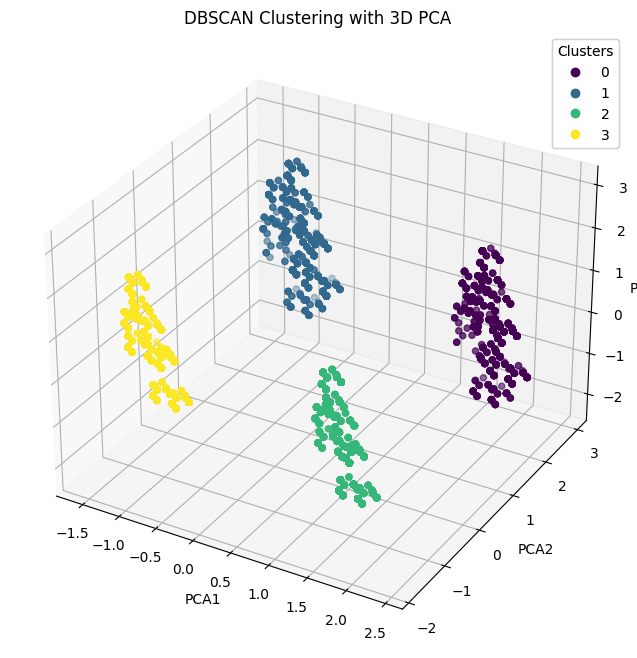

Silhouette Score (DBSCAN): 0.5364517962300158


In [ ]:
scaler = StandardScaler()
preprocessed_data_scaled = RobustScaler().fit_transform(preprocessed_data_scaled)
preprocessed_data_scaled = scaler.fit_transform(preprocessed_data)

# Apply 3D PCA for dimensionality reduction
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(preprocessed_data_scaled)

# Add PCA components to the dataframe
df['PCA1'] = pca_result_3d[:, 0]
df['PCA2'] = pca_result_3d[:, 1]
df['PCA3'] = pca_result_3d[:, 2]

# Apply DBSCAN clustering on 3D PCA components
dbscan = DBSCAN(eps=0.5, min_samples=8)  # You may need to adjust eps and min_samples
df['Cluster_DBSCAN'] = dbscan.fit_predict(pca_result_3d)

# Explore the resulting clusters
# (Note: DBSCAN assigns -1 to noise points, and other integers for clusters)
# Display the count of points in each cluster
print(df['Cluster_DBSCAN'].value_counts())

# 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['Cluster_DBSCAN'], cmap='viridis')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('DBSCAN Clustering with 3D PCA')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

# Calculate silhouette score for DBSCAN-based clustering
silhouette_avg_dbscan = silhouette_score(pca_result_3d, df['Cluster_DBSCAN'])
print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")


# 3D Kmeans

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


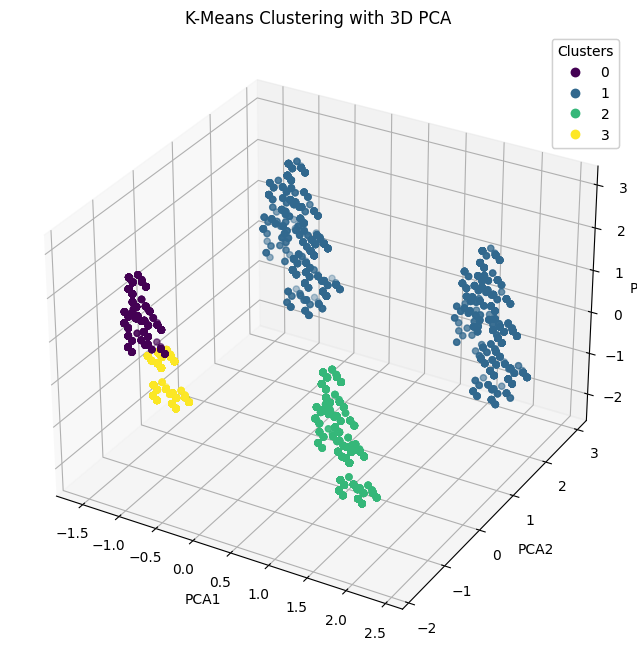

Silhouette Score (KMeans): 0.4950872514060741


In [ ]:
scaler = StandardScaler()
preprocessed_data_scaled = scaler.fit_transform(preprocessed_data)

# Apply 3D PCA for dimensionality reduction
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(preprocessed_data_scaled)

# Add PCA components to the dataframe
df['PCA1'] = pca_result_3d[:, 0]
df['PCA2'] = pca_result_3d[:, 1]
df['PCA3'] = pca_result_3d[:, 2]

# Choose the number of clusters
k = 4

# Apply k-means clustering on 3D PCA components
kmeans_pca = KMeans(n_clusters=k, random_state=42)
df['3D_KMeans'] = kmeans_pca.fit_predict(pca_result_3d)

# Explore the resulting clusters
cluster_centers_pca = pca_3d.inverse_transform(kmeans_pca.cluster_centers_)
Kmeans3D_centers_pca_df = pd.DataFrame(cluster_centers_pca, columns=preprocessed_data.columns)

# 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['3D_KMeans'], cmap='viridis')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('K-Means Clustering with 3D PCA')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

# Calculate silhouette score for KMeans-based clustering
silhouette_avg_kmeans = silhouette_score(pca_result_3d, df['3D_KMeans'])
print(f"Silhouette Score (KMeans): {silhouette_avg_kmeans}")


In [ ]:
Kmeans3D_centers_pca_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Heart Attack Risk,Cholesterol Category_Normal,Cholesterol Category_High,Cholesterol Category_Very High,Systolic Category_Low,Systolic Category_Normal,Systolic Category_High,Systolic Category_Very High,Diastolic Category_Low,Diastolic Category_Normal,...,BMI Category_Overweight,BMI Category_Obese,Triglyceride Category_Normal,Triglyceride Category_Borderline,Triglyceride Category_High,Stress Level Category_Low,Stress Level Category_Medium,Stress Level Category_High,Alcohol Consumption_No,Alcohol Consumption_Yes
0,0.009904,-0.556822,-0.201821,0.648433,-0.042024,-0.023067,0.012430,0.054502,0.043635,-0.072979,...,-0.058127,0.175458,-0.271791,-0.500882,0.612346,0.174956,0.214965,-0.337839,-0.810974,0.810974
1,-0.003039,-0.011885,-0.072976,0.062424,-0.075348,0.079824,0.069839,-0.065843,-0.018922,0.089731,...,-0.015993,-0.031401,0.581269,1.319860,-1.532120,-0.125352,0.010654,0.091127,0.030747,-0.030747
2,-0.087549,0.816202,0.339273,-0.981222,0.052439,-0.019917,-0.072067,0.034184,0.018920,-0.052587,...,0.135553,-0.112323,-0.233044,-0.561359,0.643077,-0.073023,-0.417383,0.441319,-0.809241,0.809241
3,0.049034,0.005420,0.045508,-0.037120,0.082886,-0.048874,-0.038074,-0.002978,-0.031917,0.006645,...,-0.015791,-0.056296,-0.206604,-0.554347,0.620838,0.016356,0.055773,-0.064282,1.210818,-1.210818


# Finding Best K for Kmeans 2D

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

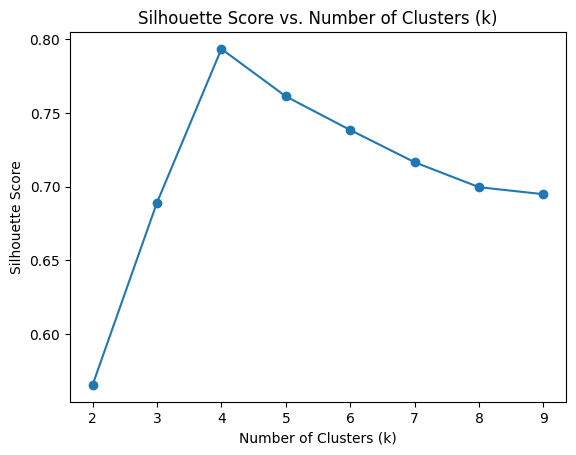

In [ ]:
scaler = StandardScaler()
preprocessed_data_scaled = scaler.fit_transform(preprocessed_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(preprocessed_data_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Compare different values of k
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    df[f'Kmeans_PCA_{k}'] = kmeans_pca.fit_predict(pca_result)

    silhouette_avg_pca = silhouette_score(pca_result, df[f'Kmeans_PCA_{k}'])
    silhouette_scores.append(silhouette_avg_pca)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


# Finding Best K for Kmeans 3D

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

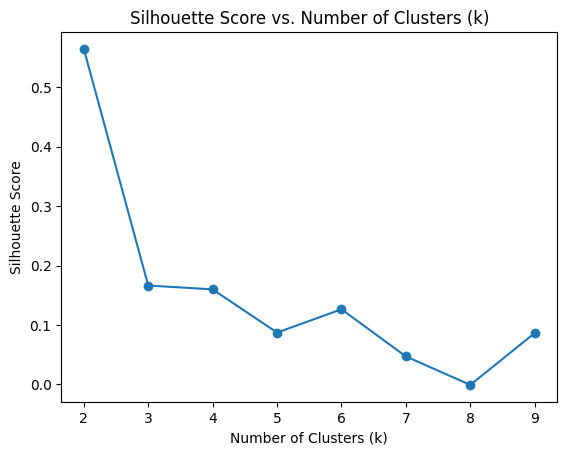

In [ ]:
scaler = StandardScaler()
preprocessed_data_scaled = scaler.fit_transform(preprocessed_data)
pca = PCA(n_components=2)
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(preprocessed_data_scaled)

# Add PCA components to the dataframe
df['PCA1'] = pca_result_3d[:, 0]
df['PCA2'] = pca_result_3d[:, 1]
df['PCA3'] = pca_result_3d[:, 2]


# Compare different values of k
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    df[f'Kmeans_PCA_{k}'] = kmeans_pca.fit_predict(pca_result_3d)

    silhouette_avg_pca = silhouette_score(pca_result, df[f'Kmeans_PCA_{k}'])
    silhouette_scores.append(silhouette_avg_pca)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


# Mean Shift(doesn't have a good answer)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


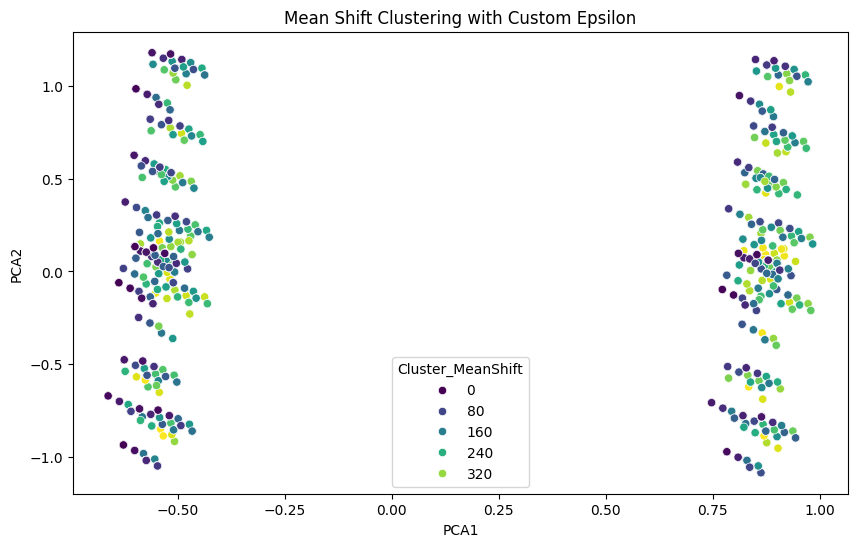

Silhouette Score (mean): 0.9943937000630227


In [ ]:
scaler = StandardScaler()
preprocessed_data_scaled = scaler.fit_transform(preprocessed_data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(preprocessed_data)

# Add PCA components to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

custom_epsilon = 0.2

# Apply Mean Shift clustering with custom epsilon
meanshift = MeanShift(bandwidth=custom_epsilon)
df['Cluster_MeanShift'] = meanshift.fit_predict(preprocessed_data_scaled)

# Visualize clusters using a scatter plot with PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_MeanShift', data=df, palette='viridis')
plt.title('Mean Shift Clustering with Custom Epsilon')
plt.show()

silhouette_avg_mean = silhouette_score(pca_result, df['Cluster_MeanShift'])
print(f"Silhouette Score (mean): {silhouette_avg_mean}")


# **Classification**

In [71]:
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Data Preprocessing for Categorical Data

In [ ]:
features = ['Stress Level Category', 'BMI Category', 'Triglyceride Category', 'Cholesterol Category', 'Alcohol Consumption', 'Systolic Category', 'Diastolic Category']
df_dummies = pd.get_dummies(df[features])  # Use pd.get_dummies directly on the dataframe
target_variable = 'Heart Attack Risk'
X = df_dummies
Y = df[target_variable]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# *Logestic Regression On Numerical Data*

In [72]:
features_numerical = ['Stress Level', 'Triglycerides', 'Systolic', 'Diastolic', 'Heart Rate', 'Sedentary Hours Per Day','Health_Metrics']
# df_dummies = pd.get_dummies(df[features])  # Use pd.get_dummies directly on the dataframe
target_variable = 'Heart Attack Risk'
X = df[features_numerical]
y = df[target_variable]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
# Shuffle the data to ensure randomness
train_x, train_y = shuffle(train_x, train_y, random_state=42)

# Initialize Logistic Regression with class_weight='balanced' for handling imbalanced classes
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Cross-validation to get an idea of the model's performance
accuracies = cross_val_score(estimator=logreg, X=train_x, y=train_y, cv=10)

print("Cross-validated accuracies:", accuracies)
print("Mean accuracy:", accuracies.mean())

# Using GridSearchCV to find the best hyperparameters (C parameter in Logistic Regression)
grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator=logreg, param_grid=grid, scoring='accuracy', cv=8,
                           n_jobs=-1, verbose=2)
grid_search = grid_search.fit(train_x, train_y)

print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

# Fit the Logistic Regression model with the best hyperparameters
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], max_iter=1000, class_weight='balanced')
best_logreg.fit(train_x, train_y)

# Evaluate the model on the test set
logreg_pred_prob = best_logreg.predict_proba(test_x)[:, 1]
threshold = 0.5
binary_predictions = (logreg_pred_prob > threshold).astype(int)
accuracy = accuracy_score(test_y, binary_predictions)
precision = precision_score(test_y, binary_predictions)
recall = recall_score(test_y, binary_predictions)
f1 = f1_score(test_y, binary_predictions)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-validated accuracies: [0.47394137 0.49511401 0.48371336 0.46416938 0.48534202 0.49022801
 0.51386623 0.50081566 0.51060359 0.4730832 ]
Mean accuracy: 0.48908768219521653
Fitting 8 folds for each of 7 candidates, totalling 56 fits
Best Score: 0.48451760104302477
Best Parameters: {'C': 1}
Test Accuracy: 0.47979139504563234
Precision: 0.33541147132169574
Recall: 0.5037453183520599
F1 Score: 0.40269461077844304


# *SVM*

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle

# Assuming you have already loaded and preprocessed your data

# Shuffle the data to ensure randomness
train_X, train_Y = shuffle(train_X, train_Y, random_state=42)

# Initialize SVM
svm = SVC()

# Cross-validation to get an idea of the model's performance
accuracies = cross_val_score(estimator=svm, X=train_X, y=train_Y, cv=10)

print("Cross-validated accuracies:", accuracies)
print("Mean accuracy:", accuracies.mean())

# Using GridSearchCV to find the best hyperparameters
grid = [{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}]

grid_search = GridSearchCV(estimator=svm, param_grid=grid, scoring='accuracy', cv=8,
                           n_jobs=-1, verbose=2)
grid_search = grid_search.fit(train_X, train_Y)

print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

# Fit the SVM model with the best hyperparameters
best_svm = SVC(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'], gamma=grid_search.best_params_['gamma'])
best_svm.fit(train_X, train_Y)

# Evaluate the model on the test set
svm_pred = best_svm.predict(test_X)
accuracy = accuracy_score(test_Y, svm_pred)
precision = precision_score(test_Y, svm_pred)
recall = recall_score(test_Y, svm_pred)
f1 = f1_score(test_Y, svm_pred)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-validated accuracies: [0.63843648 0.63843648 0.63843648 0.63843648 0.64006515 0.64006515
 0.63947798 0.63947798 0.63947798 0.63947798]
Mean accuracy: 0.6391788130144374
Fitting 8 folds for each of 12 candidates, totalling 96 fits
Best Score: 0.6391786179921772
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.651890482398957
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Initialize SVM with class_weight='balanced' for handling imbalanced classes
svm = SVC(class_weight='balanced')

# Cross-validation to get an idea of the model's performance
accuracies = cross_val_score(estimator=svm, X=train_X, y=train_Y, cv=10)

print("Cross-validated accuracies:", accuracies)
print("Mean accuracy:", accuracies.mean())

# Using GridSearchCV to find the best hyperparameters
grid = [{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}]

grid_search = GridSearchCV(estimator=svm, param_grid=grid, scoring='accuracy', cv=8,
                           n_jobs=-1, verbose=2)
grid_search = grid_search.fit(train_X, train_Y)

print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

# Fit the SVM model with the best hyperparameters
best_svm = SVC(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'],
               gamma=grid_search.best_params_['gamma'], class_weight='balanced')
best_svm.fit(train_X, train_Y)

# Evaluate the model on the test set
svm_pred = best_svm.predict(test_X)
accuracy = accuracy_score(test_Y, svm_pred)
precision = precision_score(test_Y, svm_pred)
recall = recall_score(test_Y, svm_pred)
f1 = f1_score(test_Y, svm_pred)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-validated accuracies: [0.47068404 0.50488599 0.45765472 0.48371336 0.44625407 0.41205212
 0.49755302 0.49918434 0.5040783  0.50734095]
Mean accuracy: 0.47834009065258176
Fitting 8 folds for each of 12 candidates, totalling 96 fits
Best Score: 0.5094524119947849
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.529335071707953
Precision: 0.34838709677419355
Recall: 0.4044943820224719
F1 Score: 0.3743500866551126


# *Decision Tree*

In [ ]:
# Shuffle the data to ensure randomness
train_X, train_Y = shuffle(train_X, train_Y, random_state=42)

# Initialize Decision Tree
decision_tree = DecisionTreeClassifier()

# Cross-validation to get an idea of the model's performance
accuracies = cross_val_score(estimator=decision_tree, X=train_X, y=train_Y, cv=10)

print("Cross-validated accuracies:", accuracies)
print("Mean accuracy:", accuracies.mean())

# Using GridSearchCV to find the best hyperparameters
grid = [{'max_depth': [None, 5, 10, 15],
         'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}]

grid_search = GridSearchCV(estimator=decision_tree, param_grid=grid, scoring='accuracy', cv=8,
                           n_jobs=-1, verbose=2)
grid_search = grid_search.fit(train_X, train_Y)

print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

# Fit the Decision Tree model with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                                            min_samples_split=grid_search.best_params_['min_samples_split'],
                                            min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
best_decision_tree.fit(train_X, train_Y)

# Evaluate the model on the test set
decision_tree_pred = best_decision_tree.predict(test_X)
accuracy = accuracy_score(test_Y, decision_tree_pred)
precision = precision_score(test_Y, decision_tree_pred, average='weighted')
recall = recall_score(test_Y, decision_tree_pred, average='weighted')
f1 = f1_score(test_Y, decision_tree_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-validated accuracies: [0.5781759  0.58794788 0.59283388 0.57166124 0.56351792 0.5732899
 0.57748777 0.60032626 0.56933116 0.56117455]
Mean accuracy: 0.5775746449086301
Fitting 8 folds for each of 36 candidates, totalling 288 fits
Best Score: 0.6320078226857888
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Accuracy: 0.6375488917861799
Precision: 0.5100999273732751
Recall: 0.6375488917861799
F1 Score: 0.5195776315676713


# *Random Forest*

In [ ]:
# Shuffle the data to ensure randomness
train_X, train_Y = shuffle(train_X, train_Y, random_state=42)

# Initialize RandomForestClassifier
rfc = RandomForestClassifier()

# Cross-validation to get an idea of the model's performance
accuracies = cross_val_score(estimator=rfc, X=train_X, y=train_Y, cv=10)

print("Cross-validated accuracies:", accuracies)
print("Mean accuracy:", accuracies.mean())

# Using GridSearchCV to find the best hyperparameters
grid = [{'n_estimators': [100, 300, 500], 'max_depth': [None, 5, 10, 15],
         'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}]

grid_search = GridSearchCV(estimator=rfc, param_grid=grid, scoring='accuracy', cv=8,
                           n_jobs=-1, verbose=2)
grid_search = grid_search.fit(train_X, train_Y)

print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

# Fit the RandomForestClassifier with the best hyperparameters
best_rfc = RandomForestClassifier(**grid_search.best_params_)
best_rfc.fit(train_X, train_Y)

# Evaluate the model on the test set
rfc_pred = best_rfc.predict(test_X)
accuracy = accuracy_score(test_Y, rfc_pred)
precision = precision_score(test_Y, rfc_pred, average='weighted')
recall = recall_score(test_Y, rfc_pred, average='weighted')
f1 = f1_score(test_Y, rfc_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-validated accuracies: [0.57654723 0.58469055 0.55374593 0.5732899  0.5781759  0.56514658
 0.60032626 0.54323002 0.54812398 0.57585644]
Mean accuracy: 0.5699132795936045
Fitting 8 folds for each of 108 candidates, totalling 864 fits
Best Score: 0.6391786179921772
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.651890482398957
Precision: 0.4249612010423448
Recall: 0.651890482398957
F1 Score: 0.5145149821617655


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# *XGBoost*

In [ ]:
# Shuffle the data to ensure randomness
train_X, train_Y = shuffle(train_X, train_Y, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Cross-validation to get an idea of the model's performance
accuracies = cross_val_score(estimator=xgb_classifier, X=train_X, y=train_Y, cv=10)

print("Cross-validated accuracies:", accuracies)
print("Mean accuracy:", accuracies.mean())

# Using GridSearchCV to find the best hyperparameters
grid = [{'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}]

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=grid, scoring='accuracy', cv=8,
                           n_jobs=-1, verbose=2)
grid_search = grid_search.fit(train_X, train_Y)

print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

# Fit the XGBoost model with the best hyperparameters
best_xgb = XGBClassifier(learning_rate=grid_search.best_params_['learning_rate'], n_estimators=grid_search.best_params_['n_estimators'])
best_xgb.fit(train_X, train_Y)

# Evaluate the model on the test set
xgb_pred = best_xgb.predict(test_X)
accuracy = accuracy_score(test_Y, xgb_pred)
precision = precision_score(test_Y, xgb_pred, average='weighted')
recall = recall_score(test_Y, xgb_pred, average='weighted')
f1 = f1_score(test_Y, xgb_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-validated accuracies: [0.58631922 0.5732899  0.53583062 0.55211726 0.56026059 0.5781759
 0.58727569 0.57422512 0.56117455 0.59053834]
Mean accuracy: 0.5699207188441531
Fitting 8 folds for each of 9 candidates, totalling 72 fits
Best Score: 0.6391786179921772
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Test Accuracy: 0.651890482398957
Precision: 0.4249612010423448
Recall: 0.651890482398957
F1 Score: 0.5145149821617655


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# AdaBoost

In [ ]:
# Shuffle the data to ensure randomness
train_X, train_Y = shuffle(train_X, train_Y, random_state=42)

# Initialize ADAboost classifier
adaboost_classifier = AdaBoostClassifier()

# Cross-validation to get an idea of the model's performance
accuracies = cross_val_score(estimator=adaboost_classifier, X=train_X, y=train_Y, cv=10)

print("Cross-validated accuracies:", accuracies)
print("Mean accuracy:", accuracies.mean())

# Using GridSearchCV to find the best hyperparameters
grid = [{'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}]

grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=grid, scoring='accuracy', cv=8,
                           n_jobs=-1, verbose=2)
grid_search = grid_search.fit(train_X, train_Y)

print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

# Fit the ADAboost model with the best hyperparameters
best_adaboost = AdaBoostClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                   learning_rate=grid_search.best_params_['learning_rate'])
best_adaboost.fit(train_X, train_Y)

# Evaluate the model on the test set
adaboost_pred = best_adaboost.predict(test_X)
accuracy = accuracy_score(test_Y, adaboost_pred)
precision = precision_score(test_Y, adaboost_pred, average='weighted')
recall = recall_score(test_Y, adaboost_pred, average='weighted')
f1 = f1_score(test_Y, adaboost_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-validated accuracies: [0.64006515 0.64006515 0.63843648 0.63843648 0.63843648 0.63843648
 0.63947798 0.63947798 0.63947798 0.63947798]
Mean accuracy: 0.6391788130144374
Fitting 8 folds for each of 9 candidates, totalling 72 fits
Best Score: 0.6391786179921772
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Test Accuracy: 0.651890482398957
Precision: 0.4249612010423448
Recall: 0.651890482398957
F1 Score: 0.5145149821617655


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
